all AirLines and AirPorts

In [ ]:

airlines = {
"AA::American%20Airlines%20Inc.%20%28AA%29": "American Airlines",
"UA::United%20Airlines%20Inc.%20%28UA%29": "United Airlines",
"DL::Delta%20Airlines%20Inc.%20%28DL%29": "Delta Airlines",
"WN::Southwest%20Airlines%20Co.%20%28WN%29": "Southwest Airlines"
}

airports = {
"ATL::Atlanta%2C%20GA%3A%20Hartsfield-Jackson%20Atlanta%20International": "Atlanta",
"LAX::Los%20Angeles%2C%20CA%3A%20Los%20Angeles%20International": "Los Angeles",
"ORD::Chicago%2C%20IL%3A%20Chicago%20O%27Hare%20International": "Chicago",
"DFW::Dallas/Fort%20Worth%2C%20TX%3A%20Dallas/Fort%20Worth%20International": "Dallas/Fort Worth",
"DEN::Denver%2C%20CO%3A%20Denver%20International": "Denver",
"JFK::New%20York%2C%20NY%3A%20John%20F.%20Kennedy%20International": "New York",
"SFO::San%20Francisco%2C%20CA%3A%20San%20Francisco%20International": "San Francisco",
"SEA::Seattle%2C%20WA%3A%20Seattle/Tacoma%20International": "Seattle",
"MCO::Orlando%2C%20FL%3A%20Orlando%20International": "Orlando",
"MIA::Miami%2C%20FL%3A%20Miami%20International": "Miami"
}


START over

AA January, 2024 modified month by month long time

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
import zipfile
import pandas as pd

# Define the new download directory
download_dir = r"C:\Users\mehrd\Desktop\AA2022-23-24"

# Ensure the download directory exists
os.makedirs(download_dir, exist_ok=True)

# Set up Chrome options to specify the download directory
chrome_options = webdriver.ChromeOptions()
prefs = {
  "download.default_directory": download_dir,  # Set the new download directory
  "download.prompt_for_download": False,       # Disable download prompt
  "directory_upgrade": True                    # Automatically overwrite files
}
chrome_options.add_experimental_option("prefs", prefs)

# Initialize the WebDriver with the specified options
driver = webdriver.Chrome(options=chrome_options)

# Open the website
driver.get("https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E")

# Define the airlines and airports
airlines = {
  "AA::American%20Airlines%20Inc.%20%28AA%29": "American Airlines"
}

airports = {
  "ATL::Atlanta%2C%20GA%3A%20Hartsfield-Jackson%20Atlanta%20International": "Atlanta",
  "LAX::Los%20Angeles%2C%20CA%3A%20Los%20Angeles%20International": "Los Angeles",
  "ORD::Chicago%2C%20IL%3A%20Chicago%20O%27Hare%20International": "Chicago",
  "DFW::Dallas/Fort%20Worth%2C%20TX%3A%20Dallas/Fort%20Worth%20International": "Dallas/Fort Worth",
  "DEN::Denver%2C%20CO%3A%20Denver%20International": "Denver",
  "JFK::New%20York%2C%20NY%3A%20John%20F.%20Kennedy%20International": "New York",
  "SFO::San%20Francisco%2C%20CA%3A%20San%20Francisco%20International": "San Francisco",
  "SEA::Seattle%2C%20WA%3A%20Seattle/Tacoma%20International": "Seattle",
  "MCO::Orlando%2C%20FL%3A%20Orlando%20International": "Orlando",
  "MIA::Miami%2C%20FL%3A%20Miami%20International": "Miami"
}

# Function to unzip and process files
def process_downloaded_file(file_path):
  try:
      with zipfile.ZipFile(file_path, 'r') as zip_ref:
          zip_ref.extractall(download_dir)
      # Assuming the extracted file is a CSV, adjust if necessary
      csv_file = [f for f in os.listdir(download_dir) if f.endswith('.csv')][0]
      csv_path = os.path.join(download_dir, csv_file)
      # Load CSV into DataFrame
      df = pd.read_csv(csv_path)
      # Here you can add any processing you need to do with the DataFrame
      print(df.head())  # Example: print the first few rows
  except Exception as e:
      print(f"An error occurred while processing the file: {e}")

# Iterate over each airline and airport
for airline_value, airline_name in airlines.items():
  for airport_value, airport_name in airports.items():
      try:
          # Select the airline
          airline_select = Select(driver.find_element(By.ID, "Carrier"))
          airline_select.select_by_value(airline_value)

          # Select the airport
          airport_select = Select(driver.find_element(By.ID, "Airport"))
          airport_select.select_by_value(airport_value)

          # Select the period 
          period_from_select = Select(driver.find_element(By.ID, "PeriodFrom"))
          period_from_select.select_by_value("24289")  # January, 2024

          period_to_select = Select(driver.find_element(By.ID, "PeriodTo"))
          period_to_select.select_by_value("24289")  # January, 2024

          # Submit the form
          submit_button = driver.find_element(By.ID, "submit")
          submit_button.click()

          # Wait for the results to load
          WebDriverWait(driver, 50).until(
              EC.presence_of_element_located((By.LINK_TEXT, "Download Raw Data"))
          )

          # Download the raw data
          download_link = driver.find_element(By.LINK_TEXT, "Download Raw Data")
          download_link.click()

          # Wait for the download to complete
          time.sleep(50)  # Adjust the sleep time as needed

          # Process the downloaded file
          downloaded_file = max([os.path.join(download_dir, f) for f in os.listdir(download_dir)], key=os.path.getctime)
          process_downloaded_file(downloaded_file)
      except Exception as e:
          print(f"An error occurred: {e}")

# Close the WebDriver
driver.quit()

   year  month carrier               carrier_name airport  \
0  2024      1      AA  American Airlines Network     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        547.0      200.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0       62.97        9.49  ...         0.78             88.61            4.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           0.0    13160.0         3723.0          912.0     1624.0   

   security_delay  late_aircraft_delay  
0            25.0               6876.0  

[1 rows x 21 columns]
   year  month carrier               carrier_name airport  \
0  2024      1      AA  American Airlines Network     LAX   

                                 airport_name  arr_flights  arr_del15  \
0  Los Angeles, CA: Los Angeles International       2417.0      611.0   

   carrier_ct  weather_ct  ...  secur

AA January 2023 to December 2023 long time 

In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
import zipfile
import pandas as pd

# Define the new download directory
download_dir = r"C:\Users\mehrd\Desktop\AA2022-23-24"

# Ensure the download directory exists
os.makedirs(download_dir, exist_ok=True)

# Set up Chrome options to specify the download directory
chrome_options = webdriver.ChromeOptions()
prefs = {
  "download.default_directory": download_dir,  # Set the new download directory
  "download.prompt_for_download": False,       # Disable download prompt
  "directory_upgrade": True                    # Automatically overwrite files
}
chrome_options.add_experimental_option("prefs", prefs)

# Initialize the WebDriver with the specified options
driver = webdriver.Chrome(options=chrome_options)

# Open the website
driver.get("https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E")

# Define the airlines and airports
airlines = {
  "AA::American%20Airlines%20Inc.%20%28AA%29": "American Airlines"
}

airports = {
  "ATL::Atlanta%2C%20GA%3A%20Hartsfield-Jackson%20Atlanta%20International": "Atlanta",
  "LAX::Los%20Angeles%2C%20CA%3A%20Los%20Angeles%20International": "Los Angeles",
  "ORD::Chicago%2C%20IL%3A%20Chicago%20O%27Hare%20International": "Chicago",
  "DFW::Dallas/Fort%20Worth%2C%20TX%3A%20Dallas/Fort%20Worth%20International": "Dallas/Fort Worth",
  "DEN::Denver%2C%20CO%3A%20Denver%20International": "Denver",
  "JFK::New%20York%2C%20NY%3A%20John%20F.%20Kennedy%20International": "New York",
  "SFO::San%20Francisco%2C%20CA%3A%20San%20Francisco%20International": "San Francisco",
  "SEA::Seattle%2C%20WA%3A%20Seattle/Tacoma%20International": "Seattle",
  "MCO::Orlando%2C%20FL%3A%20Orlando%20International": "Orlando",
  "MIA::Miami%2C%20FL%3A%20Miami%20International": "Miami"
}

# Function to unzip and process files
def process_downloaded_file(file_path):
  try:
      with zipfile.ZipFile(file_path, 'r') as zip_ref:
          zip_ref.extractall(download_dir)
      # Assuming the extracted file is a CSV, adjust if necessary
      csv_file = [f for f in os.listdir(download_dir) if f.endswith('.csv')][0]
      csv_path = os.path.join(download_dir, csv_file)
      # Load CSV into DataFrame
      df = pd.read_csv(csv_path)
      # Here you can add any processing you need to do with the DataFrame
      print(df.head())  # Example: print the first few rows
  except Exception as e:
      print(f"An error occurred while processing the file: {e}")

# Iterate over each airline and airport
for airline_value, airline_name in airlines.items():
  for airport_value, airport_name in airports.items():
      for month_value in range(24277, 24289):  # Values for January 2023 to December 2023
          try:
              # Select the airline
              airline_select = Select(driver.find_element(By.ID, "Carrier"))
              airline_select.select_by_value(airline_value)

              # Select the airport
              airport_select = Select(driver.find_element(By.ID, "Airport"))
              airport_select.select_by_value(airport_value)

              # Select the period 
              period_from_select = Select(driver.find_element(By.ID, "PeriodFrom"))
              period_from_select.select_by_value(str(month_value))

              period_to_select = Select(driver.find_element(By.ID, "PeriodTo"))
              period_to_select.select_by_value(str(month_value))

              # Submit the form
              submit_button = driver.find_element(By.ID, "submit")
              submit_button.click()

              # Wait for the results to load
              WebDriverWait(driver, 50).until(
                  EC.presence_of_element_located((By.LINK_TEXT, "Download Raw Data"))
              )

              # Download the raw data
              download_link = driver.find_element(By.LINK_TEXT, "Download Raw Data")
              download_link.click()

              # Wait for the download to complete
              time.sleep(50)  # Adjust the sleep time as needed

              # Process the downloaded file
              downloaded_file = max([os.path.join(download_dir, f) for f in os.listdir(download_dir)], key=os.path.getctime)
              process_downloaded_file(downloaded_file)
          except Exception as e:
              print(f"An error occurred: {e}")

# Close the WebDriver
driver.quit()

   year  month carrier               carrier_name airport  \
0  2023      1      AA  American Airlines Network     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        649.0      193.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0       67.08        2.47  ...         0.72             62.03           14.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           4.0    13545.0         4712.0          239.0     2623.0   

   security_delay  late_aircraft_delay  
0            24.0               5947.0  

[1 rows x 21 columns]
   year  month carrier               carrier_name airport  \
0  2023      2      AA  American Airlines Network     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        662.0      143.0   

   carrier_ct  weather_

AA January 2022 to December 2022 shortend wiating time 

In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
import zipfile
import pandas as pd

# Define the new download directory
download_dir = r"C:\Users\mehrd\Desktop\AA2022-23-24"

# Ensure the download directory exists
os.makedirs(download_dir, exist_ok=True)

# Set up Chrome options to specify the download directory
chrome_options = webdriver.ChromeOptions()
prefs = {
  "download.default_directory": download_dir,  # Set the new download directory
  "download.prompt_for_download": False,       # Disable download prompt
  "directory_upgrade": True                    # Automatically overwrite files
}
chrome_options.add_experimental_option("prefs", prefs)

# Initialize the WebDriver with the specified options
driver = webdriver.Chrome(options=chrome_options)

# Open the website
driver.get("https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E")

# Define the airlines and airports
airlines = {
  "AA::American%20Airlines%20Inc.%20%28AA%29": "American Airlines"
}

airports = {
  "ATL::Atlanta%2C%20GA%3A%20Hartsfield-Jackson%20Atlanta%20International": "Atlanta",
  "LAX::Los%20Angeles%2C%20CA%3A%20Los%20Angeles%20International": "Los Angeles",
  "ORD::Chicago%2C%20IL%3A%20Chicago%20O%27Hare%20International": "Chicago",
  "DFW::Dallas/Fort%20Worth%2C%20TX%3A%20Dallas/Fort%20Worth%20International": "Dallas/Fort Worth",
  "DEN::Denver%2C%20CO%3A%20Denver%20International": "Denver",
  "JFK::New%20York%2C%20NY%3A%20John%20F.%20Kennedy%20International": "New York",
  "SFO::San%20Francisco%2C%20CA%3A%20San%20Francisco%20International": "San Francisco",
  "SEA::Seattle%2C%20WA%3A%20Seattle/Tacoma%20International": "Seattle",
  "MCO::Orlando%2C%20FL%3A%20Orlando%20International": "Orlando",
  "MIA::Miami%2C%20FL%3A%20Miami%20International": "Miami"
}

# Function to unzip and process files
def process_downloaded_file(file_path):
  try:
      with zipfile.ZipFile(file_path, 'r') as zip_ref:
          zip_ref.extractall(download_dir)
      # Assuming the extracted file is a CSV, adjust if necessary
      csv_file = [f for f in os.listdir(download_dir) if f.endswith('.csv')][0]
      csv_path = os.path.join(download_dir, csv_file)
      # Load CSV into DataFrame
      df = pd.read_csv(csv_path)
      # Here you can add any processing you need to do with the DataFrame
      print(df.head())  # Example: print the first few rows
  except Exception as e:
      print(f"An error occurred while processing the file: {e}")

# Function to wait for the download to complete
def wait_for_download_to_complete(download_dir, timeout=60):
  seconds = 0
  downloaded_file = None
  while seconds < timeout:
      time.sleep(1)
      seconds += 1
      # Check for new files in the download directory
      files = [os.path.join(download_dir, f) for f in os.listdir(download_dir)]
      if files:
          # Get the most recently modified file
          downloaded_file = max(files, key=os.path.getctime)
          # Check if the file is still being written to
          if not os.path.isfile(downloaded_file) or os.path.getsize(downloaded_file) == 0:
              continue
          # If the file size hasn't changed for a few seconds, assume download is complete
          time.sleep(2)
          if os.path.getsize(downloaded_file) == os.path.getsize(downloaded_file):
              break
  return downloaded_file

# Iterate over each airline and airport
for airline_value, airline_name in airlines.items():
  for airport_value, airport_name in airports.items():
      for month_value in range(24265, 24277):  # Values for January 2022 to December 2022
          try:
              # Select the airline
              airline_select = Select(driver.find_element(By.ID, "Carrier"))
              airline_select.select_by_value(airline_value)

              # Select the airport
              airport_select = Select(driver.find_element(By.ID, "Airport"))
              airport_select.select_by_value(airport_value)

              # Select the period 
              period_from_select = Select(driver.find_element(By.ID, "PeriodFrom"))
              period_from_select.select_by_value(str(month_value))

              period_to_select = Select(driver.find_element(By.ID, "PeriodTo"))
              period_to_select.select_by_value(str(month_value))

              # Submit the form
              submit_button = driver.find_element(By.ID, "submit")
              submit_button.click()

              # Wait for the results to load
              WebDriverWait(driver, 50).until(
                  EC.presence_of_element_located((By.LINK_TEXT, "Download Raw Data"))
              )

              # Download the raw data
              download_link = driver.find_element(By.LINK_TEXT, "Download Raw Data")
              download_link.click()

              # Wait for the download to complete
              downloaded_file = wait_for_download_to_complete(download_dir, timeout=60)
              process_downloaded_file(downloaded_file)
          except Exception as e:
              print(f"An error occurred: {e}")

# Close the WebDriver
driver.quit()

   year  month carrier               carrier_name airport  \
0  2022      1      AA  American Airlines Network     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        673.0      107.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0       48.02        2.48  ...         1.71             29.12           13.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           1.0     6079.0         2855.0           96.0     1032.0   

   security_delay  late_aircraft_delay  
0            76.0               2020.0  

[1 rows x 21 columns]
   year  month carrier               carrier_name airport  \
0  2022      2      AA  American Airlines Network     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        614.0      116.0   

   carrier_ct  weather_

UA January 2024 to July 2024

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
import zipfile
import pandas as pd

# Define the new download directory
download_dir = r"C:\Users\mehrd\Desktop\AA2022-23-24"

# Ensure the download directory exists
os.makedirs(download_dir, exist_ok=True)

# Set up Chrome options to specify the download directory
chrome_options = webdriver.ChromeOptions()
prefs = {
"download.default_directory": download_dir,  # Set the new download directory
"download.prompt_for_download": False,       # Disable download prompt
"directory_upgrade": True                    # Automatically overwrite files
}
chrome_options.add_experimental_option("prefs", prefs)

# Initialize the WebDriver with the specified options
driver = webdriver.Chrome(options=chrome_options)

# Open the website
driver.get("https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E")

# Define the airlines and airports
airlines = {
  "UA::United%20Airlines%20Inc.%20%28UA%29": "United Airlines"
}

airports = {
  "ATL::Atlanta%2C%20GA%3A%20Hartsfield-Jackson%20Atlanta%20International": "Atlanta",
  "LAX::Los%20Angeles%2C%20CA%3A%20Los%20Angeles%20International": "Los Angeles",
  "ORD::Chicago%2C%20IL%3A%20Chicago%20O%27Hare%20International": "Chicago",
  "DFW::Dallas/Fort%20Worth%2C%20TX%3A%20Dallas/Fort%20Worth%20International": "Dallas/Fort Worth",
  "DEN::Denver%2C%20CO%3A%20Denver%20International": "Denver",
  "JFK::New%20York%2C%20NY%3A%20John%20F.%20Kennedy%20International": "New York",
  "SFO::San%20Francisco%2C%20CA%3A%20San%20Francisco%20International": "San Francisco",
  "SEA::Seattle%2C%20WA%3A%20Seattle/Tacoma%20International": "Seattle",
  "MCO::Orlando%2C%20FL%3A%20Orlando%20International": "Orlando",
  "MIA::Miami%2C%20FL%3A%20Miami%20International": "Miami"
}

# Function to unzip and process files
def process_downloaded_file(file_path):
  try:
      with zipfile.ZipFile(file_path, 'r') as zip_ref:
          zip_ref.extractall(download_dir)
      # Assuming the extracted file is a CSV, adjust if necessary
      csv_file = [f for f in os.listdir(download_dir) if f.endswith('.csv')][0]
      csv_path = os.path.join(download_dir, csv_file)
      # Load CSV into DataFrame
      df = pd.read_csv(csv_path)
      # Here you can add any processing you need to do with the DataFrame
      print(df.head())  # Example: print the first few rows
  except Exception as e:
      print(f"An error occurred while processing the file: {e}")

# Function to wait for the download to complete
def wait_for_download_to_complete(download_dir, timeout=60):
  seconds = 0
  downloaded_file = None
  while seconds < timeout:
      time.sleep(1)
      seconds += 1
      # Check for new files in the download directory
      files = [os.path.join(download_dir, f) for f in os.listdir(download_dir)]
      if files:
          # Get the most recently modified file
          downloaded_file = max(files, key=os.path.getctime)
          # Check if the file is still being written to
          if not os.path.isfile(downloaded_file) or os.path.getsize(downloaded_file) == 0:
              continue
          # If the file size hasn't changed for a few seconds, assume download is complete
          time.sleep(2)
          if os.path.getsize(downloaded_file) == os.path.getsize(downloaded_file):
              break
  return downloaded_file

# Iterate over each airline and airport
for airline_value, airline_name in airlines.items():
  for airport_value, airport_name in airports.items():
      for month_value in range(24289, 24296):  # Values for January 2024 to July 2024
          try:
              # Select the airline
              airline_select = Select(driver.find_element(By.ID, "Carrier"))
              airline_select.select_by_value(airline_value)

              # Select the airport
              airport_select = Select(driver.find_element(By.ID, "Airport"))
              airport_select.select_by_value(airport_value)

              # Select the period 
              period_from_select = Select(driver.find_element(By.ID, "PeriodFrom"))
              period_from_select.select_by_value(str(month_value))

              period_to_select = Select(driver.find_element(By.ID, "PeriodTo"))
              period_to_select.select_by_value(str(month_value))

              # Submit the form
              submit_button = driver.find_element(By.ID, "submit")
              submit_button.click()

              # Wait for the results to load
              WebDriverWait(driver, 50).until(
                  EC.presence_of_element_located((By.LINK_TEXT, "Download Raw Data"))
              )

              # Download the raw data
              download_link = driver.find_element(By.LINK_TEXT, "Download Raw Data")
              download_link.click()

              # Wait for the download to complete
              downloaded_file = wait_for_download_to_complete(download_dir, timeout=60)
              process_downloaded_file(downloaded_file)
          except Exception as e:
              print(f"An error occurred: {e}")

# Close the WebDriver
driver.quit()

   year  month carrier              carrier_name airport  \
0  2024      1      UA  United Air Lines Network     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        530.0      104.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0       39.48        5.73  ...          0.0             37.79           30.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           3.0     8742.0         2715.0         1245.0     1283.0   

   security_delay  late_aircraft_delay  
0             0.0               3499.0  

[1 rows x 21 columns]
   year  month carrier              carrier_name airport  \
0  2024      2      UA  United Air Lines Network     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        542.0       75.0   

   carrier_ct  weather_ct  

UA January 2023 to December 2023

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
import zipfile
import pandas as pd

# Define the new download directory
download_dir = r"C:\Users\mehrd\Desktop\AA2022-23-24"

# Ensure the download directory exists
os.makedirs(download_dir, exist_ok=True)

# Set up Chrome options to specify the download directory
chrome_options = webdriver.ChromeOptions()
prefs = {
  "download.default_directory": download_dir,  # Set the new download directory
  "download.prompt_for_download": False,       # Disable download prompt
  "directory_upgrade": True                    # Automatically overwrite files
}
chrome_options.add_experimental_option("prefs", prefs)

# Initialize the WebDriver with the specified options
driver = webdriver.Chrome(options=chrome_options)

# Open the website
driver.get("https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E")

# Define the airlines and airports
airlines = {
"UA::United%20Airlines%20Inc.%20%28UA%29": "United Airlines"
}

airports = {
  "ATL::Atlanta%2C%20GA%3A%20Hartsfield-Jackson%20Atlanta%20International": "Atlanta",
  "LAX::Los%20Angeles%2C%20CA%3A%20Los%20Angeles%20International": "Los Angeles",
  "ORD::Chicago%2C%20IL%3A%20Chicago%20O%27Hare%20International": "Chicago",
  "DFW::Dallas/Fort%20Worth%2C%20TX%3A%20Dallas/Fort%20Worth%20International": "Dallas/Fort Worth",
  "DEN::Denver%2C%20CO%3A%20Denver%20International": "Denver",
  "JFK::New%20York%2C%20NY%3A%20John%20F.%20Kennedy%20International": "New York",
  "SFO::San%20Francisco%2C%20CA%3A%20San%20Francisco%20International": "San Francisco",
  "SEA::Seattle%2C%20WA%3A%20Seattle/Tacoma%20International": "Seattle",
  "MCO::Orlando%2C%20FL%3A%20Orlando%20International": "Orlando",
  "MIA::Miami%2C%20FL%3A%20Miami%20International": "Miami"
}

# Function to unzip and process files
def process_downloaded_file(file_path):
  try:
      with zipfile.ZipFile(file_path, 'r') as zip_ref:
          zip_ref.extractall(download_dir)
      # Assuming the extracted file is a CSV, adjust if necessary
      csv_file = [f for f in os.listdir(download_dir) if f.endswith('.csv')][0]
      csv_path = os.path.join(download_dir, csv_file)
      # Load CSV into DataFrame
      df = pd.read_csv(csv_path)
      # Here you can add any processing you need to do with the DataFrame
      print(df.head())  # Example: print the first few rows
  except Exception as e:
      print(f"An error occurred while processing the file: {e}")

# Function to wait for the download to complete
def wait_for_download_to_complete(download_dir, timeout=60):
  seconds = 0
  downloaded_file = None
  while seconds < timeout:
      time.sleep(1)
      seconds += 1
      # Check for new files in the download directory
      files = [os.path.join(download_dir, f) for f in os.listdir(download_dir)]
      if files:
          # Get the most recently modified file
          downloaded_file = max(files, key=os.path.getctime)
          # Check if the file is still being written to
          if not os.path.isfile(downloaded_file) or os.path.getsize(downloaded_file) == 0:
              continue
          # If the file size hasn't changed for a few seconds, assume download is complete
          time.sleep(2)
          if os.path.getsize(downloaded_file) == os.path.getsize(downloaded_file):
              break
  return downloaded_file

# Iterate over each airline and airport
for airline_value, airline_name in airlines.items():
  for airport_value, airport_name in airports.items():
      for month_value in range(24277, 24289):  # Values for January 2023 to December 2023
          try:
              # Select the airline
              airline_select = Select(driver.find_element(By.ID, "Carrier"))
              airline_select.select_by_value(airline_value)

              # Select the airport
              airport_select = Select(driver.find_element(By.ID, "Airport"))
              airport_select.select_by_value(airport_value)

              # Select the period 
              period_from_select = Select(driver.find_element(By.ID, "PeriodFrom"))
              period_from_select.select_by_value(str(month_value))

              period_to_select = Select(driver.find_element(By.ID, "PeriodTo"))
              period_to_select.select_by_value(str(month_value))

              # Submit the form
              submit_button = driver.find_element(By.ID, "submit")
              submit_button.click()

              # Wait for the results to load
              WebDriverWait(driver, 50).until(
                  EC.presence_of_element_located((By.LINK_TEXT, "Download Raw Data"))
              )

              # Download the raw data
              download_link = driver.find_element(By.LINK_TEXT, "Download Raw Data")
              download_link.click()

              # Wait for the download to complete
              downloaded_file = wait_for_download_to_complete(download_dir, timeout=60)
              process_downloaded_file(downloaded_file)
          except Exception as e:
              print(f"An error occurred: {e}")

# Close the WebDriver
driver.quit()

   year  month carrier              carrier_name airport  \
0  2023      1      UA  United Air Lines Network     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        545.0      160.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0       62.65        1.97  ...          0.0             40.06            4.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           1.0     9447.0         3561.0          148.0     2512.0   

   security_delay  late_aircraft_delay  
0             0.0               3226.0  

[1 rows x 21 columns]
   year  month carrier              carrier_name airport  \
0  2023      2      UA  United Air Lines Network     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        533.0      127.0   

   carrier_ct  weather_ct  

KeyboardInterrupt: 

In [1]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\mehrd\Desktop\AA2022-23-24\UA\UA-2022-2023-notcomplet.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Save the cleaned DataFrame back to the same file path
df_cleaned.to_csv(file_path, index=False)

print("Duplicates removed and file saved successfully.")

Duplicates removed and file saved successfully.


UA January 2022 to December 2022

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
import zipfile
import pandas as pd

# Define the new download directory
download_dir = r"C:\Users\mehrd\Desktop\AA2022-23-24"

# Ensure the download directory exists
os.makedirs(download_dir, exist_ok=True)

# Set up Chrome options to specify the download directory
chrome_options = webdriver.ChromeOptions()
prefs = {
  "download.default_directory": download_dir,  # Set the new download directory
  "download.prompt_for_download": False,       # Disable download prompt
  "directory_upgrade": True                    # Automatically overwrite files
}
chrome_options.add_experimental_option("prefs", prefs)

# Initialize the WebDriver with the specified options
driver = webdriver.Chrome(options=chrome_options)

# Open the website
driver.get("https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E")

# Define the airlines and airports
airlines = {
"UA::United%20Airlines%20Inc.%20%28UA%29": "United Airlines"
}

airports = {
  "ATL::Atlanta%2C%20GA%3A%20Hartsfield-Jackson%20Atlanta%20International": "Atlanta",
  "LAX::Los%20Angeles%2C%20CA%3A%20Los%20Angeles%20International": "Los Angeles",
  "ORD::Chicago%2C%20IL%3A%20Chicago%20O%27Hare%20International": "Chicago",
  "DFW::Dallas/Fort%20Worth%2C%20TX%3A%20Dallas/Fort%20Worth%20International": "Dallas/Fort Worth",
  "DEN::Denver%2C%20CO%3A%20Denver%20International": "Denver",
  "JFK::New%20York%2C%20NY%3A%20John%20F.%20Kennedy%20International": "New York",
  "SFO::San%20Francisco%2C%20CA%3A%20San%20Francisco%20International": "San Francisco",
  "SEA::Seattle%2C%20WA%3A%20Seattle/Tacoma%20International": "Seattle",
  "MCO::Orlando%2C%20FL%3A%20Orlando%20International": "Orlando",
  "MIA::Miami%2C%20FL%3A%20Miami%20International": "Miami"
}

# Function to unzip and process files
def process_downloaded_file(file_path):
  try:
      with zipfile.ZipFile(file_path, 'r') as zip_ref:
          zip_ref.extractall(download_dir)
      # Assuming the extracted file is a CSV, adjust if necessary
      csv_file = [f for f in os.listdir(download_dir) if f.endswith('.csv')][0]
      csv_path = os.path.join(download_dir, csv_file)
      # Load CSV into DataFrame
      df = pd.read_csv(csv_path)
      # Here you can add any processing you need to do with the DataFrame
      print(df.head())  # Example: print the first few rows
  except Exception as e:
      print(f"An error occurred while processing the file: {e}")

# Function to wait for the download to complete
def wait_for_download_to_complete(download_dir, timeout=60):
  seconds = 0
  downloaded_file = None
  while seconds < timeout:
      time.sleep(1)
      seconds += 1
      # Check for new files in the download directory
      files = [os.path.join(download_dir, f) for f in os.listdir(download_dir)]
      if files:
          # Get the most recently modified file
          downloaded_file = max(files, key=os.path.getctime)
          # Check if the file is still being written to
          if not os.path.isfile(downloaded_file) or os.path.getsize(downloaded_file) == 0:
              continue
          # If the file size hasn't changed for a few seconds, assume download is complete
          time.sleep(2)
          if os.path.getsize(downloaded_file) == os.path.getsize(downloaded_file):
              break
  return downloaded_file

# Iterate over each airline and airport
for airline_value, airline_name in airlines.items():
  for airport_value, airport_name in airports.items():
      for month_value in range(24265, 24277):  # Values for January 2022 to December 2022
          try:
              # Select the airline
              airline_select = Select(driver.find_element(By.ID, "Carrier"))
              airline_select.select_by_value(airline_value)

              # Select the airport
              airport_select = Select(driver.find_element(By.ID, "Airport"))
              airport_select.select_by_value(airport_value)

              # Select the period 
              period_from_select = Select(driver.find_element(By.ID, "PeriodFrom"))
              period_from_select.select_by_value(str(month_value))

              period_to_select = Select(driver.find_element(By.ID, "PeriodTo"))
              period_to_select.select_by_value(str(month_value))

              # Submit the form
              submit_button = driver.find_element(By.ID, "submit")
              submit_button.click()

              # Wait for the results to load
              WebDriverWait(driver, 50).until(
                  EC.presence_of_element_located((By.LINK_TEXT, "Download Raw Data"))
              )

              # Download the raw data
              download_link = driver.find_element(By.LINK_TEXT, "Download Raw Data")
              download_link.click()

              # Wait for the download to complete
              downloaded_file = wait_for_download_to_complete(download_dir, timeout=60)
              process_downloaded_file(downloaded_file)
          except Exception as e:
              print(f"An error occurred: {e}")

# Close the WebDriver
driver.quit()

   year  month carrier              carrier_name airport  \
0  2022      1      UA  United Air Lines Network     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        235.0       57.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0       27.91        1.66  ...          0.0             17.24           22.0   

   arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
0           1.0     4230.0         1867.0          201.0      763.0   

   security_delay  late_aircraft_delay  
0             0.0               1399.0  

[1 rows x 21 columns]
   year  month carrier              carrier_name airport  \
0  2022      2      UA  United Air Lines Network     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        213.0       53.0   

   carrier_ct  weather_ct  

just 2022-23 anual report

In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
import zipfile
import pandas as pd

# Define the download directory
download_dir = r"C:\Users\mehrd\Desktop\AA2022-23-24"

# Ensure the download directory exists
os.makedirs(download_dir, exist_ok=True)

# Set up Chrome options to specify the download directory
chrome_options = webdriver.ChromeOptions()
prefs = {
  "download.default_directory": download_dir,  # Set the new download directory
  "download.prompt_for_download": False,       # Disable download prompt
  "directory_upgrade": True                    # Automatically overwrite files
}
chrome_options.add_experimental_option("prefs", prefs)

# Initialize the WebDriver with the specified options
driver = webdriver.Chrome(options=chrome_options)

# Open the website
driver.get("https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E")

airlines = {
  "AA::American%20Airlines%20Inc.%20%28AA%29": "American Airlines",
  "UA::United%20Airlines%20Inc.%20%28UA%29": "United Airlines",
  "DL::Delta%20Airlines%20Inc.%20%28DL%29": "Delta Airlines",
  "WN::Southwest%20Airlines%20Co.%20%28WN%29": "Southwest Airlines"
}

airports = {
  "ATL::Atlanta%2C%20GA%3A%20Hartsfield-Jackson%20Atlanta%20International": "Atlanta",
  "LAX::Los%20Angeles%2C%20CA%3A%20Los%20Angeles%20International": "Los Angeles",
  "ORD::Chicago%2C%20IL%3A%20Chicago%20O%27Hare%20International": "Chicago",
  "DFW::Dallas/Fort%20Worth%2C%20TX%3A%20Dallas/Fort%20Worth%20International": "Dallas/Fort Worth",
  "DEN::Denver%2C%20CO%3A%20Denver%20International": "Denver",
  "JFK::New%20York%2C%20NY%3A%20John%20F.%20Kennedy%20International": "New York",
  "SFO::San%20Francisco%2C%20CA%3A%20San%20Francisco%20International": "San Francisco",
  "SEA::Seattle%2C%20WA%3A%20Seattle/Tacoma%20International": "Seattle",
  "MCO::Orlando%2C%20FL%3A%20Orlando%20International": "Orlando",
  "MIA::Miami%2C%20FL%3A%20Miami%20International": "Miami"
}

# Function to unzip and process files
def process_downloaded_file(file_path, airline_name, airport_name, year):
  try:
      with zipfile.ZipFile(file_path, 'r') as zip_ref:
          zip_ref.extractall(download_dir)
      # Assuming the extracted file is a CSV, adjust if necessary
      csv_file = [f for f in os.listdir(download_dir) if f.endswith('.csv')][0]
      csv_path = os.path.join(download_dir, csv_file)
      # Load CSV into DataFrame
      df = pd.read_csv(csv_path)
      # Save the processed DataFrame to a new CSV file
      output_file = f"{airline_name}_{airport_name}_{year}.csv"
      output_path = os.path.join(download_dir, output_file)
      df.to_csv(output_path, index=False)
      print(f"Saved data to {output_path}")
  except Exception as e:
      print(f"An error occurred while processing the file: {e}")

# Function to wait for the download to complete
def wait_for_download_to_complete(download_dir, timeout=60):
  seconds = 0
  downloaded_file = None
  while seconds < timeout:
      time.sleep(1)
      seconds += 1
      # Check for new files in the download directory
      files = [os.path.join(download_dir, f) for f in os.listdir(download_dir)]
      if files:
          # Get the most recently modified file
          downloaded_file = max(files, key=os.path.getctime)
          # Check if the file is still being written to
          if not os.path.isfile(downloaded_file) or os.path.getsize(downloaded_file) == 0:
              continue
          # If the file size hasn't changed for a few seconds, assume download is complete
          time.sleep(2)
          if os.path.getsize(downloaded_file) == os.path.getsize(downloaded_file):
              break
  return downloaded_file

# Iterate over each airline and airport
for airline_code, airline_name in airlines.items():
  for airport_code, airport_name in airports.items():
      for year in range(2022, 2025):  # Years 2022 to 2024
          try:
              # Select the airline
              airline_select = Select(driver.find_element(By.ID, "Carrier"))
              airline_select.select_by_value(airline_code)

              # Select the airport
              airport_select = Select(driver.find_element(By.ID, "Airport"))
              airport_select.select_by_value(airport_code)

              # Select the period for the entire year
              period_from_select = Select(driver.find_element(By.ID, "PeriodFrom"))
              period_from_select.select_by_value(str(24265 + (year - 2022) * 12))  # January of the year

              period_to_select = Select(driver.find_element(By.ID, "PeriodTo"))
              period_to_select.select_by_value(str(24276 + (year - 2022) * 12))  # December of the year

              # Submit the form
              submit_button = driver.find_element(By.ID, "submit")
              submit_button.click()

              # Wait for the results to load
              WebDriverWait(driver, 50).until(
                  EC.presence_of_element_located((By.LINK_TEXT, "Download Raw Data"))
              )

              # Download the raw data
              download_link = driver.find_element(By.LINK_TEXT, "Download Raw Data")
              download_link.click()

              # Wait for the download to complete
              downloaded_file = wait_for_download_to_complete(download_dir, timeout=60)
              process_downloaded_file(downloaded_file, airline_name, airport_name, year)
          except Exception as e:
              print(f"An error occurred: {e}")

# Close the WebDriver
driver.quit()

Saved data to C:\Users\mehrd\Desktop\AA2022-23-24\American Airlines_Atlanta_2022.csv
Saved data to C:\Users\mehrd\Desktop\AA2022-23-24\American Airlines_Atlanta_2023.csv
An error occurred: Message: Cannot locate option with value: 24300; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception

Saved data to C:\Users\mehrd\Desktop\AA2022-23-24\American Airlines_Los Angeles_2022.csv
Saved data to C:\Users\mehrd\Desktop\AA2022-23-24\American Airlines_Los Angeles_2023.csv
An error occurred: Message: Cannot locate option with value: 24300; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception

Saved data to C:\Users\mehrd\Desktop\AA2022-23-24\American Airlines_Chicago_2022.csv
Saved data to C:\Users\mehrd\Desktop\AA2022-23-24\American Airlines_Chicago_2023.csv
An error occurred: Message: Cannot locate option with 

just 2024 anual report

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import os
import zipfile
import pandas as pd

# Define the download directory
download_dir = r"C:\Users\mehrd\Desktop\AA2022-23-24"

# Ensure the download directory exists
os.makedirs(download_dir, exist_ok=True)

# Set up Chrome options to specify the download directory
chrome_options = webdriver.ChromeOptions()
prefs = {
    "download.default_directory": download_dir,  # Set the new download directory
    "download.prompt_for_download": False,       # Disable download prompt
    "directory_upgrade": True                    # Automatically overwrite files
}
chrome_options.add_experimental_option("prefs", prefs)

# Initialize the WebDriver with the specified options
driver = webdriver.Chrome(options=chrome_options)

# Open the website
driver.get("https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E")

airlines = {
    "AA::American%20Airlines%20Inc.%20%28AA%29": "American Airlines",
    "UA::United%20Airlines%20Inc.%20%28UA%29": "United Airlines",
    "DL::Delta%20Airlines%20Inc.%20%28DL%29": "Delta Airlines",
    "WN::Southwest%20Airlines%20Co.%20%28WN%29": "Southwest Airlines"
}

airports = {
    "ATL::Atlanta%2C%20GA%3A%20Hartsfield-Jackson%20Atlanta%20International": "Atlanta",
    "LAX::Los%20Angeles%2C%20CA%3A%20Los%20Angeles%20International": "Los Angeles",
    "ORD::Chicago%2C%20IL%3A%20Chicago%20O%27Hare%20International": "Chicago",
    "DFW::Dallas/Fort%20Worth%2C%20TX%3A%20Dallas/Fort%20Worth%20International": "Dallas/Fort Worth",
    "DEN::Denver%2C%20CO%3A%20Denver%20International": "Denver",
    "JFK::New%20York%2C%20NY%3A%20John%20F.%20Kennedy%20International": "New York",
    "SFO::San%20Francisco%2C%20CA%3A%20San%20Francisco%20International": "San Francisco",
    "SEA::Seattle%2C%20WA%3A%20Seattle/Tacoma%20International": "Seattle",
    "MCO::Orlando%2C%20FL%3A%20Orlando%20International": "Orlando",
    "MIA::Miami%2C%20FL%3A%20Miami%20International": "Miami"
}

# Function to unzip and process files
def process_downloaded_file(file_path, airline_name, airport_name, year):
    try:
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(download_dir)
        # Assuming the extracted file is a CSV, adjust if necessary
        csv_file = [f for f in os.listdir(download_dir) if f.endswith('.csv')][0]
        csv_path = os.path.join(download_dir, csv_file)
        # Load CSV into DataFrame
        df = pd.read_csv(csv_path)
        # Save the processed DataFrame to a new CSV file
        output_file = f"{airline_name}_{airport_name}_{year}.csv"
        output_path = os.path.join(download_dir, output_file)
        df.to_csv(output_path, index=False)
        print(f"Saved data to {output_path}")
    except Exception as e:
        print(f"An error occurred while processing the file: {e}")

# Function to wait for the download to complete
def wait_for_download_to_complete(download_dir, timeout=60):
    seconds = 0
    downloaded_file = None
    while seconds < timeout:
        time.sleep(1)
        seconds += 1
        # Check for new files in the download directory
        files = [os.path.join(download_dir, f) for f in os.listdir(download_dir)]
        if files:
            # Get the most recently modified file
            downloaded_file = max(files, key=os.path.getctime)
            # Check if the file is still being written to
            if not os.path.isfile(downloaded_file) or os.path.getsize(downloaded_file) == 0:
                continue
            # If the file size hasn't changed for a few seconds, assume download is complete
            time.sleep(2)
            if os.path.getsize(downloaded_file) == os.path.getsize(downloaded_file):
                break
    return downloaded_file

# Iterate over each airline and airport
for airline_code, airline_name in airlines.items():
    for airport_code, airport_name in airports.items():
        try:
            # Select the airline
            airline_select = Select(driver.find_element(By.ID, "Carrier"))
            airline_select.select_by_value(airline_code.split("::")[0])

            # Select the airport
            airport_select = Select(driver.find_element(By.ID, "Airport"))
            airport_select.select_by_value(airport_code.split("::")[0])

            # Select the period for the entire year 2024
            period_from_select = Select(driver.find_element(By.ID, "PeriodFrom"))
            period_from_select.select_by_value("24289")  # January 2024

            period_to_select = Select(driver.find_element(By.ID, "PeriodTo"))
            period_to_select.select_by_value("24296")  # December 2024

            # Submit the form
            submit_button = driver.find_element(By.ID, "submit")
            submit_button.click()

            # Wait for the results to load
            WebDriverWait(driver, 50).until(
                EC.presence_of_element_located((By.LINK_TEXT, "Download Raw Data"))
            )

            # Download the raw data
            download_link = driver.find_element(By.LINK_TEXT, "Download Raw Data")
            download_link.click()

            # Wait for the download to complete
            downloaded_file = wait_for_download_to_complete(download_dir, timeout=60)
            process_downloaded_file(downloaded_file, airline_name, airport_name, 2024)
        except Exception as e:
            print(f"An error occurred: {e}")

# Close the WebDriver
driver.quit()

In [2]:
import pandas as pd

# File path
csv_file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_coordinates.csv"

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Check for missing months
all_months = set(range(1, 13))
present_months = set(df['month'].unique())
missing_months = all_months - present_months

# Check for missing airlines
all_airlines = df['carrier'].unique()
missing_airlines = df[df['carrier'].isnull()]['carrier'].unique()

# Check for missing airports
all_airports = df['airport'].unique()
missing_airports = df[df['airport'].isnull()]['airport'].unique()

# Print results
print("Missing Months:", sorted(missing_months))
print("Missing Airlines:", missing_airlines)
print("Missing Airports:", missing_airports)

# Additional check for any completely missing data
missing_data_summary = df.isnull().sum()
print("\nSummary of Missing Data in Each Column:")
print(missing_data_summary)

Missing Months: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Missing Airlines: []
Missing Airports: []

Summary of Missing Data in Each Column:
year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights              0
arr_del15                0
carrier_ct               0
weather_ct               0
nas_ct                   0
security_ct              0
late_aircraft_ct         0
arr_cancelled            0
arr_diverted             0
arr_delay                0
carrier_delay            0
weather_delay            0
nas_delay                0
security_delay           0
late_aircraft_delay      0
latitude               218
longitude              218
dtype: int64


In [11]:
import pandas as pd

# Load the original CSV file
original_file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_coordinates.csv"
original_df = pd.read_csv(original_file_path)

# Load the second CSV file with complete geographical data
airports_file_path = r"C:\Users\mehrd\Desktop\usa-airports.csv"
airports_df = pd.read_csv(airports_file_path)

# Merge the DataFrames on the airport code (original 'airport' column with 'iata' in the airports file)
merged_df = pd.merge(
  original_df,
  airports_df[['iata', 'latitude', 'longitude']],
  left_on='airport',
  right_on='iata',
  how='left',
  suffixes=('', '_new')
)

# Fill missing latitude and longitude in the original DataFrame
original_df['latitude'].fillna(merged_df['latitude_new'], inplace=True)
original_df['longitude'].fillna(merged_df['longitude_new'], inplace=True)

# Save the updated DataFrame back to a CSV file
updated_file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_coordinates_updated.csv"
original_df.to_csv(updated_file_path, index=False)

# Created/Modified files during execution:
print(updated_file_path)

C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_coordinates_updated.csv


year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
latitude               1
longitude              1
dtype: int64
          latitude    longitude
count  1157.000000  1157.000000
mean     36.114212   -98.316115
std       6.346542    17.533397
min      25.794979  -122.383989
25%      32.895951  -118.421359
50%      33.942168   -97.037200
75%      40.642948   -81.309443
max      47.448982   -73.779373


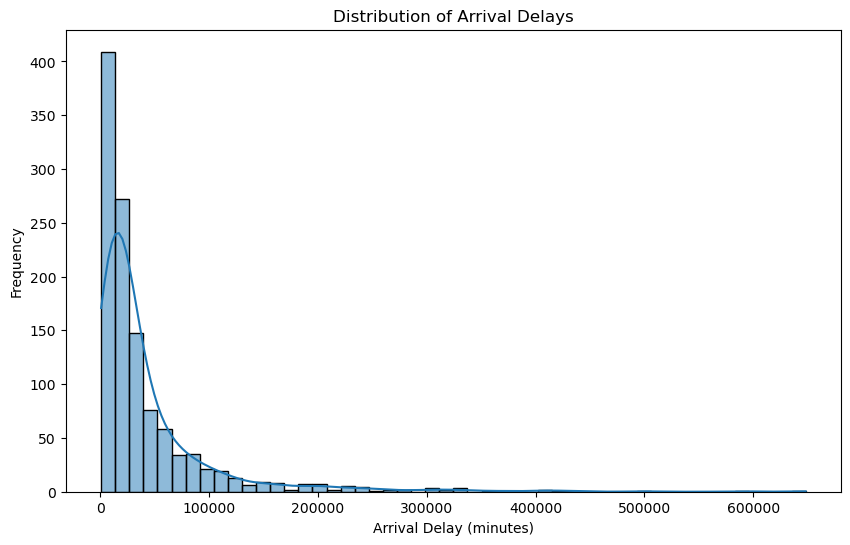

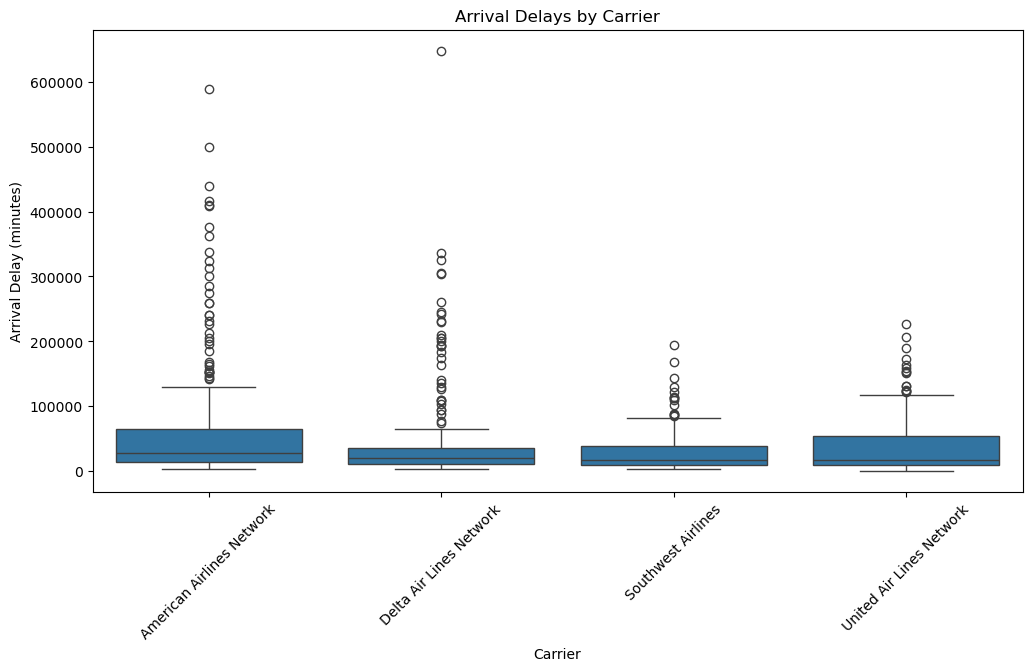

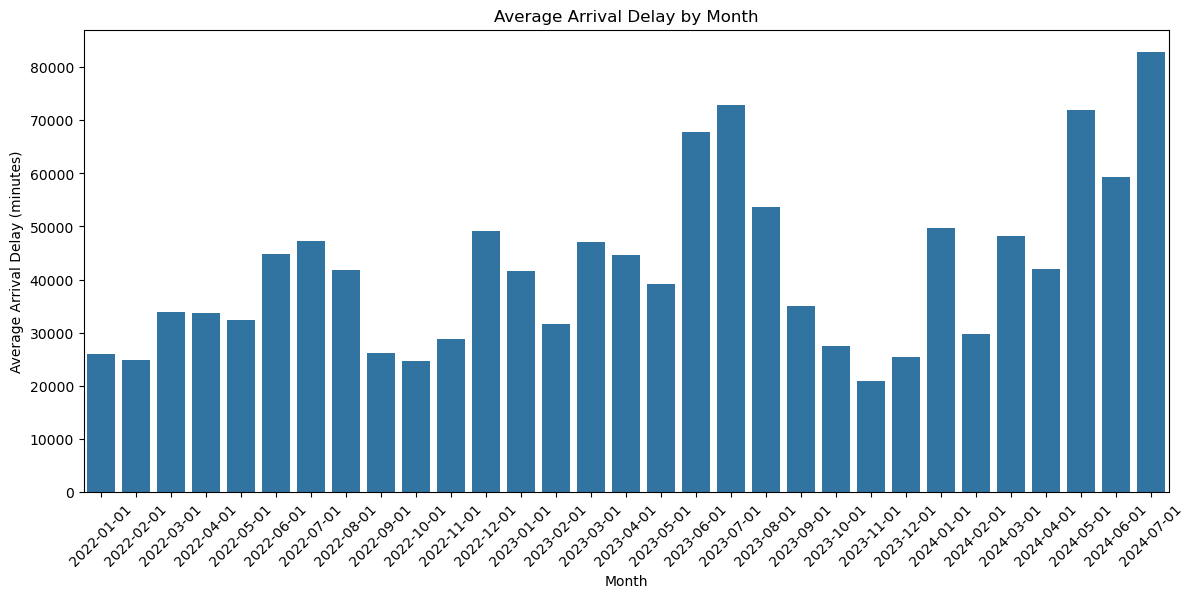

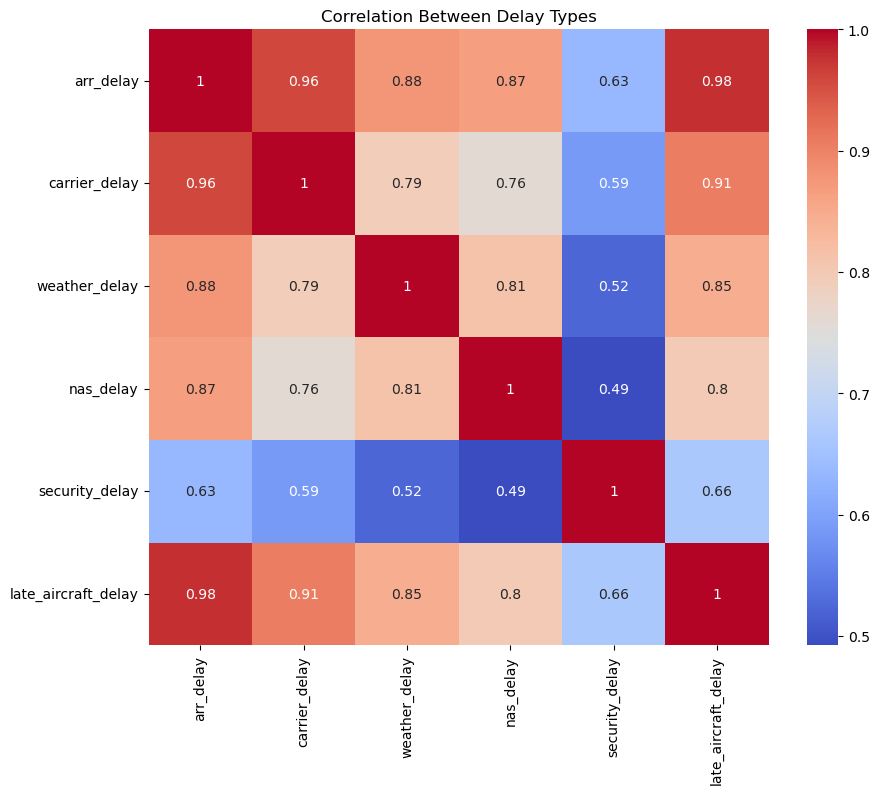

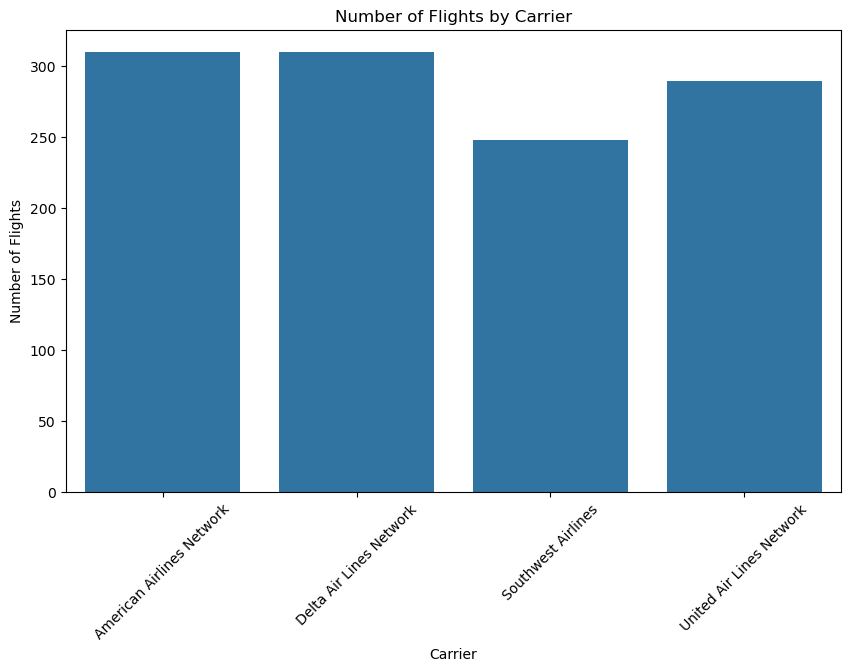

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_coordinates_updated.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

# Convert 'year' and 'month' to numeric, and handle any conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')

# Convert delay-related columns to numeric, handling errors
delay_columns = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
for col in delay_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN in 'year' or 'month' after conversion
df.dropna(subset=['year', 'month'], inplace=True)

# Create a 'date' column
df['date'] = pd.to_datetime(df['year'].astype(int).astype(str) + '-' + df['month'].astype(int).astype(str), format='%Y-%m')

# Plot the distribution of arrival delays
plt.figure(figsize=(10, 6))
sns.histplot(df['arr_delay'].dropna(), bins=50, kde=True)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Box plot of delays by carrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='carrier_name', y='arr_delay', data=df)
plt.title('Arrival Delays by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

# Bar chart of average delay by month
monthly_delay = df.groupby('date')['arr_delay'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(x='date', y='arr_delay', data=monthly_delay)
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

# Heatmap of correlation between delay types
plt.figure(figsize=(10, 8))
sns.heatmap(df[delay_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Delay Types')
plt.show()

# Count of flights by carrier
plt.figure(figsize=(10, 6))
sns.countplot(x='carrier_name', data=df)
plt.title('Number of Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()



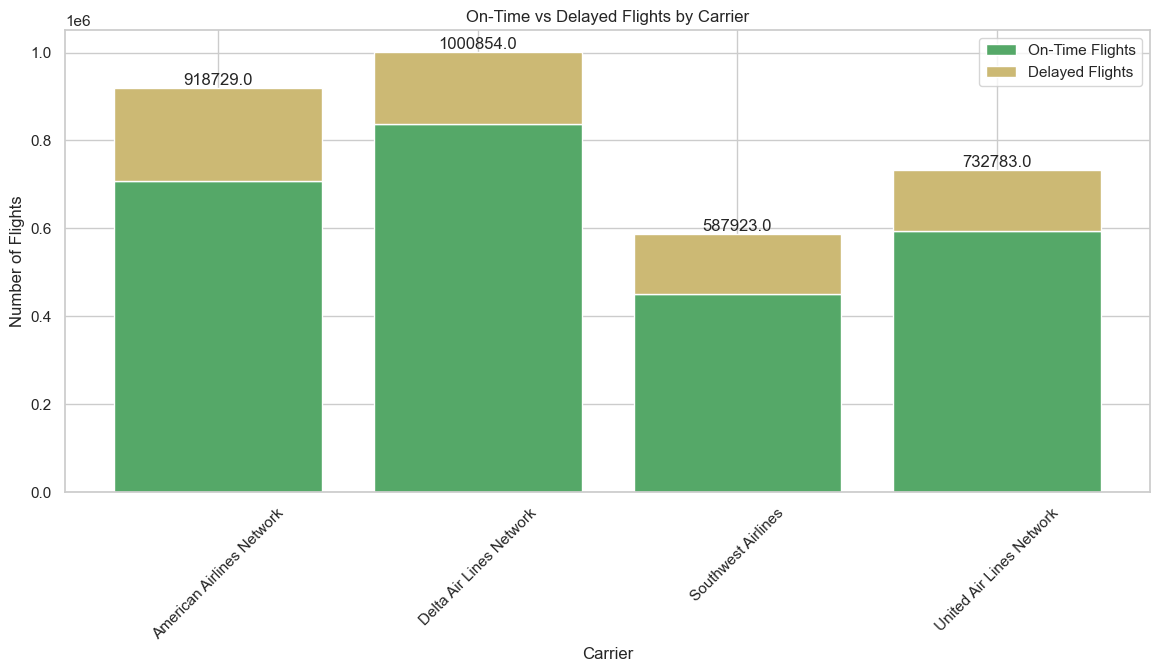

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Convert 'year' and 'month' to numeric, and handle any conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')

# Convert relevant columns to numeric, handling errors
columns_to_convert = ['arr_flights', 'arr_del15', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
for col in columns_to_convert:
  df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN in 'year' or 'month' after conversion
df.dropna(subset=['year', 'month'], inplace=True)

# Create a 'date' column
df['date'] = pd.to_datetime(df['year'].astype(int).astype(str) + '-' + df['month'].astype(int).astype(str), format='%Y-%m')

# Calculate on-time flights
df['on_time_flights'] = df['arr_flights'] - df['arr_del15']

# Group data by carrier
df_grouped = df.groupby('carrier_name').agg({'on_time_flights': 'sum', 'arr_del15': 'sum'}).reset_index()
df_grouped['total_flights'] = df_grouped['on_time_flights'] + df_grouped['arr_del15']

# Plot the number of on-time and delayed flights by carrier
plt.figure(figsize=(14, 6))
bar_width = 0.35
bar1 = plt.bar(df_grouped['carrier_name'], df_grouped['on_time_flights'], color='g', label='On-Time Flights')
bar2 = plt.bar(df_grouped['carrier_name'], df_grouped['arr_del15'], bottom=df_grouped['on_time_flights'], color='y', label='Delayed Flights')

# Annotate total flights on top of the bars
for i, total in enumerate(df_grouped['total_flights']):
  plt.text(i, total + 50, str(total), ha='center', va='bottom')

plt.title('On-Time vs Delayed Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<Figure size 1800x600 with 0 Axes>

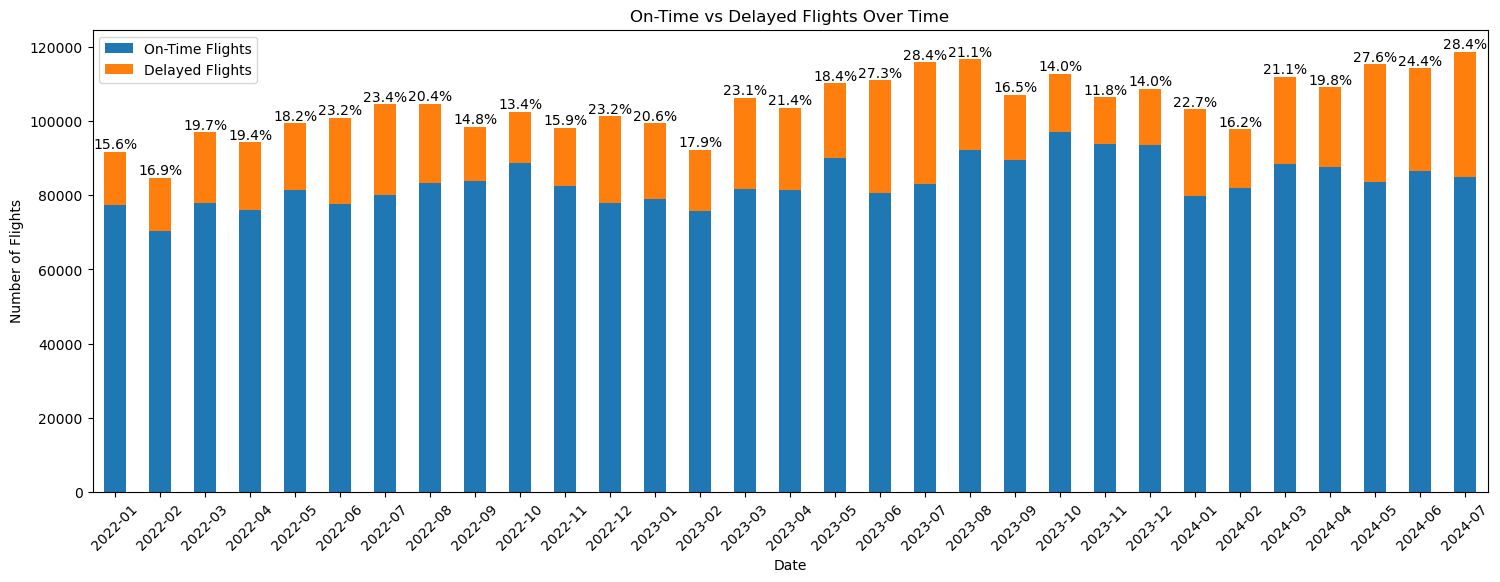

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_coordinates_updated.csv"
df = pd.read_csv(file_path)

# Convert 'year' and 'month' to numeric, and handle any conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')

# Convert relevant columns to numeric, handling errors
columns_to_convert = ['arr_flights', 'arr_del15', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
for col in columns_to_convert:
  df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN in 'year' or 'month' after conversion
df.dropna(subset=['year', 'month'], inplace=True)

# Create a 'date' column
df['date'] = pd.to_datetime(df['year'].astype(int).astype(str) + '-' + df['month'].astype(int).astype(str), format='%Y-%m')

# Calculate on-time flights
df['on_time_flights'] = df['arr_flights'] - df['arr_del15']

# Plot the number of on-time and delayed flights over time
plt.figure(figsize=(18, 6))
df_time_grouped = df.groupby('date').agg({'on_time_flights': 'sum', 'arr_del15': 'sum'}).reset_index()
ax = df_time_grouped.plot(kind='bar', x='date', stacked=True, figsize=(18, 6))
plt.title('On-Time vs Delayed Flights Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(['On-Time Flights', 'Delayed Flights'])

# Format the x-axis to show only year and month
ax.xaxis.set_major_formatter(plt.FixedFormatter(df_time_grouped['date'].dt.strftime('%Y-%m')))

# Add percentage of delayed flights on top of each bar
for index, row in df_time_grouped.iterrows():
  total_flights = row['on_time_flights'] + row['arr_del15']
  if total_flights > 0:
      percentage_delayed = (row['arr_del15'] / total_flights) * 100
      ax.text(index, total_flights, f'{percentage_delayed:.1f}%', ha='center', va='bottom')

plt.show()

In [7]:
import pandas as pd

# Load the data
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_coordinates_updated.csv"
df = pd.read_csv(file_path)

# Convert 'year' and 'month' to numeric, and handle any conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')

# Convert 'arr_cancelled' to numeric, handling errors
df['arr_cancelled'] = pd.to_numeric(df['arr_cancelled'], errors='coerce')

# Drop rows with NaN in 'year' or 'month' after conversion
df.dropna(subset=['year', 'month'], inplace=True)

# Group by month and sum the canceled flights
monthly_cancellations = df.groupby('month')['arr_cancelled'].sum().reset_index()

# Sort the months by the number of canceled flights in descending order
ranked_months = monthly_cancellations.sort_values(by='arr_cancelled', ascending=False)

# Display the ranked months
print(ranked_months)

    month  arr_cancelled
0     1.0         9293.0
6     7.0         8069.0
5     6.0         7262.0
1     2.0         5718.0
11   12.0         4750.0
4     5.0         4528.0
7     8.0         4045.0
3     4.0         3910.0
2     3.0         3278.0
8     9.0         2163.0
10   11.0         1168.0
9    10.0          948.0


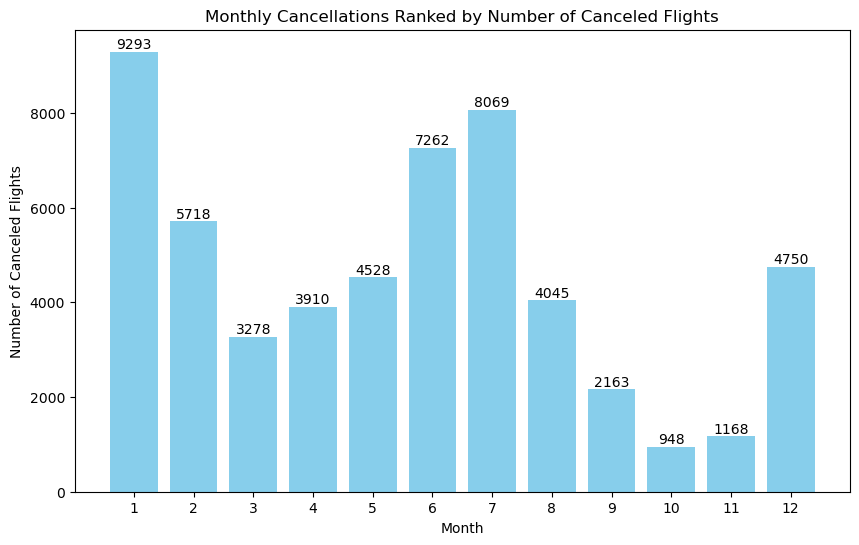

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_coordinates_updated.csv"
df = pd.read_csv(file_path)

# Convert 'year' and 'month' to numeric, and handle any conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')

# Convert 'arr_cancelled' to numeric, handling errors
df['arr_cancelled'] = pd.to_numeric(df['arr_cancelled'], errors='coerce')

# Drop rows with NaN in 'year', 'month', or 'arr_cancelled' after conversion
df.dropna(subset=['year', 'month', 'arr_cancelled'], inplace=True)

# Group by month and sum the canceled flights
monthly_cancellations = df.groupby('month')['arr_cancelled'].sum().reset_index()

# Sort the months by the number of canceled flights in descending order
ranked_months = monthly_cancellations.sort_values(by='arr_cancelled', ascending=False)

# Plot the ranked months
plt.figure(figsize=(10, 6))
bars = plt.bar(ranked_months['month'], ranked_months['arr_cancelled'], color='skyblue')
plt.title('Monthly Cancellations Ranked by Number of Canceled Flights')
plt.xlabel('Month')
plt.ylabel('Number of Canceled Flights')
plt.xticks(ranked_months['month'])

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [16]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\mehrd\Desktop\ALLAIRLINES-Airline_Delay_Cause.csv"
data = pd.read_csv(file_path)

# Define the correct column names for airlines and airports
airline_column = 'carrier_name'
airport_column = 'airport_name'

# Find and print the number of unique airlines
unique_airlines = data[airline_column].nunique()
print(f"Number of unique airlines: {unique_airlines}")

# Print the names of unique airlines
unique_airline_names = data[airline_column].unique()
print("Unique airlines:")
for airline in unique_airline_names:
  print(airline)

# Find and print the number of unique airports
unique_airports = data[airport_column].nunique()
print(f"\nNumber of unique airports: {unique_airports}")

# Print the names of unique airports
unique_airport_names = data[airport_column].unique()
print("Unique airports:")
for airport in unique_airport_names:
  print(airport)

# Find and remove duplicate rows
duplicates = data.duplicated()
print(f"\nNumber of duplicate rows: {duplicates.sum()}")

# Remove duplicates
cleaned_data = data.drop_duplicates()

# Save the cleaned data back to the same path
cleaned_file_path = r"C:\Users\mehrd\Desktop\ALLAIRLINES-Airline_Delay_Cause_Cleaned.csv"
cleaned_data.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned data saved to: {cleaned_file_path}")

Number of unique airlines: 26
Unique airlines:
Endeavor Air Inc.
American Airlines Network
Alaska Airlines Network
JetBlue Airways
CommuteAir LLC dba CommuteAir
Delta Air Lines Network
Frontier Airlines
Allegiant Air
GoJet Airlines LLC d/b/a United Express
Hawaiian Airlines Network
Envoy Air
Spirit Airlines
PSA Airlines Inc.
SkyWest Airlines Inc.
Piedmont Airlines
Horizon Air
United Air Lines Network
Southwest Airlines
Mesa Airlines Inc.
Republic Airline
Air Wisconsin Airlines Corp
Commutair Aka Champlain Enterprises, Inc.
Empire Airlines Inc.
ExpressJet Airlines LLC
Trans States Airlines
Compass Airlines

Number of unique airports: 408
Unique airports:
Allentown/Bethlehem/Easton, PA: Lehigh Valley International
Alexandria, LA: Alexandria International
Augusta, GA: Augusta Regional at Bush Field
Albany, NY: Albany International
Atlanta, GA: Hartsfield-Jackson Atlanta International
Appleton, WI: Appleton International
Austin, TX: Austin - Bergstrom International
Asheville, NC: Asheville

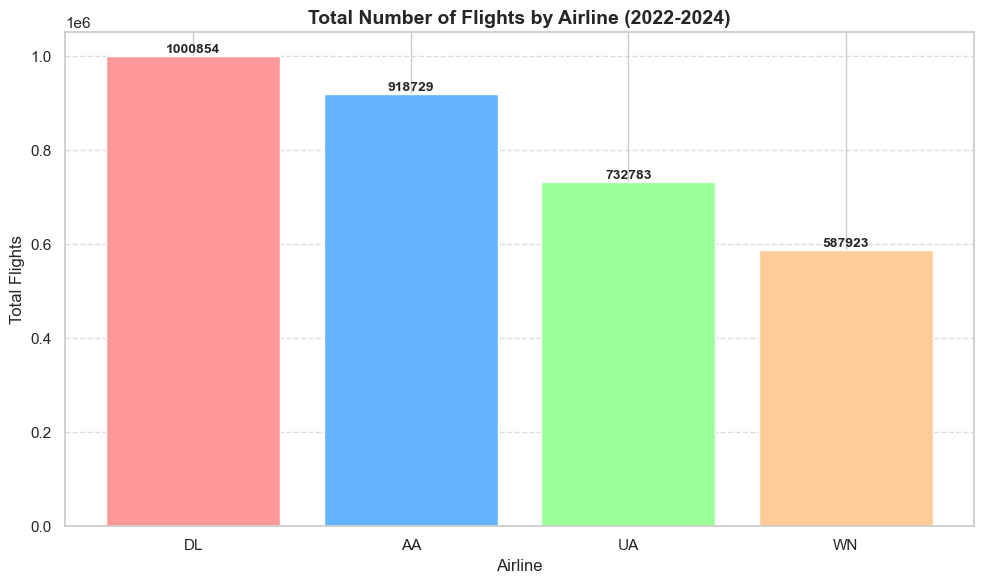

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Convert the 'year' column to integer, handling any potential conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter the data for the years 2022 to 2024
df_filtered = df[(df['year'] >= 2022) & (df['year'] <= 2024)]

# List of airlines to consider
airlines = ['AA', 'UA', 'DL', 'WN']

# Calculate the total number of flights for each airline
total_flights_by_airline = df_filtered[df_filtered['carrier'].isin(airlines)].groupby('carrier')['arr_flights'].sum()

# Sort the airlines by total flights in descending order
total_flights_by_airline = total_flights_by_airline.sort_values(ascending=False)

# Define colors for the bars
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(total_flights_by_airline.index, total_flights_by_airline.values, color=colors)

# Add numbers on top of each bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, fontweight='bold')

plt.title('Total Number of Flights by Airline (2022-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Total Flights', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Calculate the total number of on-time flights
# Assuming 'arr_del15' represents flights delayed by 15 minutes or more
df['on_time_flights'] = df['arr_flights'] - df['arr_del15']

# Calculate the total number of on-time flights across all records
total_on_time_flights = df['on_time_flights'].sum()

# Print the result
print(f"Total number of on-time flights: {total_on_time_flights}")

Total number of on-time flights: 2588002.0


C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\3404750589.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['on_time_flights'] = df_filtered['arr_flights'] - df_filtered['arr_del15']


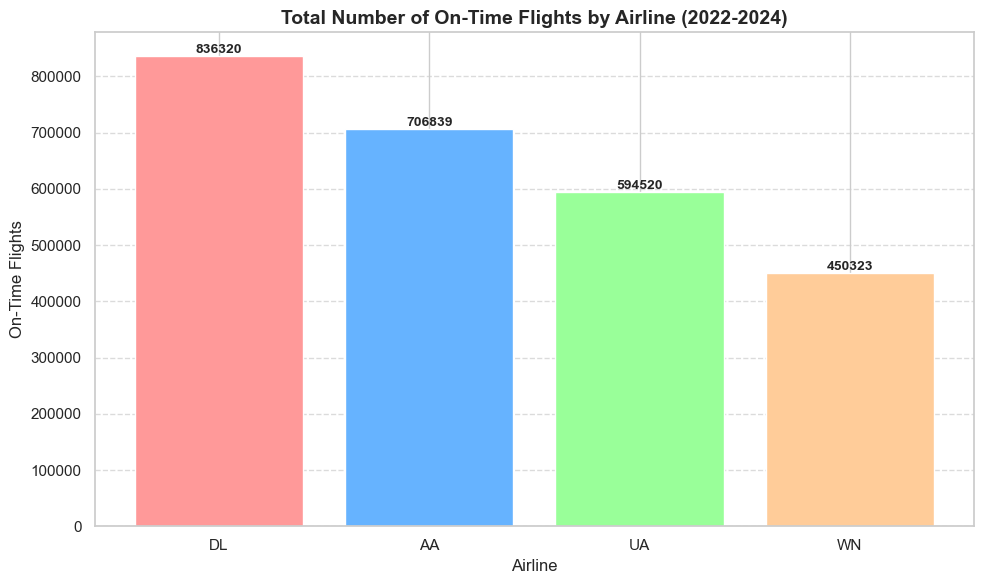

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Convert the 'year' column to integer, handling any potential conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter the data for the years 2022 to 2024
df_filtered = df[(df['year'] >= 2022) & (df['year'] <= 2024)]

# List of airlines to consider
airlines = ['AA', 'UA', 'DL', 'WN']

# Calculate the number of on-time flights for each record
df_filtered['on_time_flights'] = df_filtered['arr_flights'] - df_filtered['arr_del15']

# Calculate the total number of on-time flights for each airline
on_time_flights_by_airline = df_filtered[df_filtered['carrier'].isin(airlines)].groupby('carrier')['on_time_flights'].sum()

# Sort the airlines by on-time flights in descending order
on_time_flights_by_airline = on_time_flights_by_airline.sort_values(ascending=False)

# Define colors for the bars
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(on_time_flights_by_airline.index, on_time_flights_by_airline.values, color=colors)

# Add numbers on top of each bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, fontweight='bold')

plt.title('Total Number of On-Time Flights by Airline (2022-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Airline', fontsize=12)
plt.ylabel('On-Time Flights', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

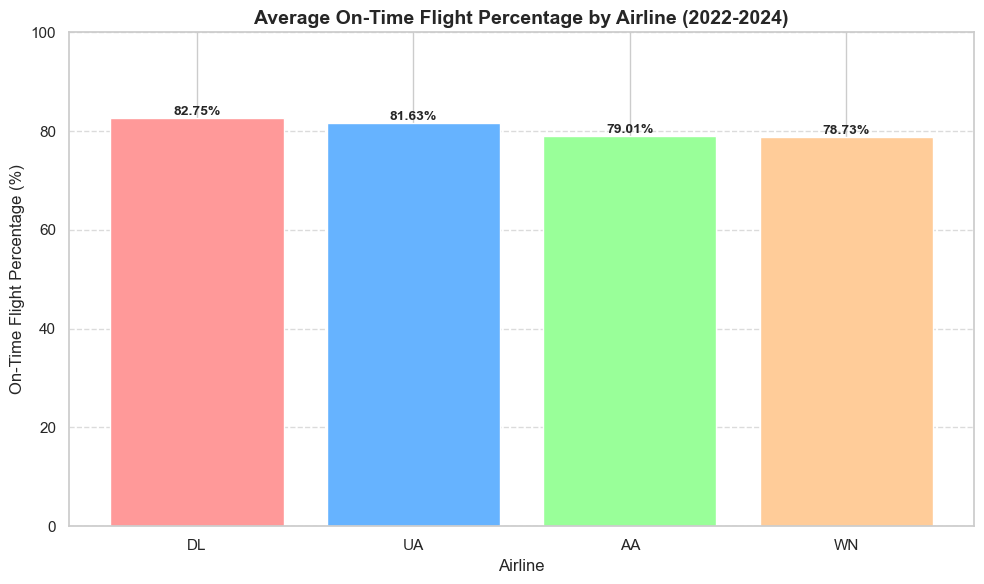

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Convert the 'year' column to integer, handling any potential conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter the data for the years 2022 to 2024
df_filtered = df[(df['year'] >= 2022) & (df['year'] <= 2024)]

# List of airlines to consider
airlines = ['AA', 'UA', 'DL', 'WN']

# Calculate the average on-time flight percentage for each airline
ontime_percentage_by_airline = df_filtered[df_filtered['carrier'].isin(airlines)].groupby('carrier')['ontime_flight_chance'].mean()

# Sort the airlines by on-time flight percentage in descending order
ontime_percentage_by_airline = ontime_percentage_by_airline.sort_values(ascending=False)

# Define colors for the bars
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(ontime_percentage_by_airline.index, ontime_percentage_by_airline.values, color=colors)

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", va='bottom', ha='center', fontsize=10, fontweight='bold')

plt.title('Average On-Time Flight Percentage by Airline (2022-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Airline', fontsize=12)
plt.ylabel('On-Time Flight Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Assuming the percentage is between 0 and 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

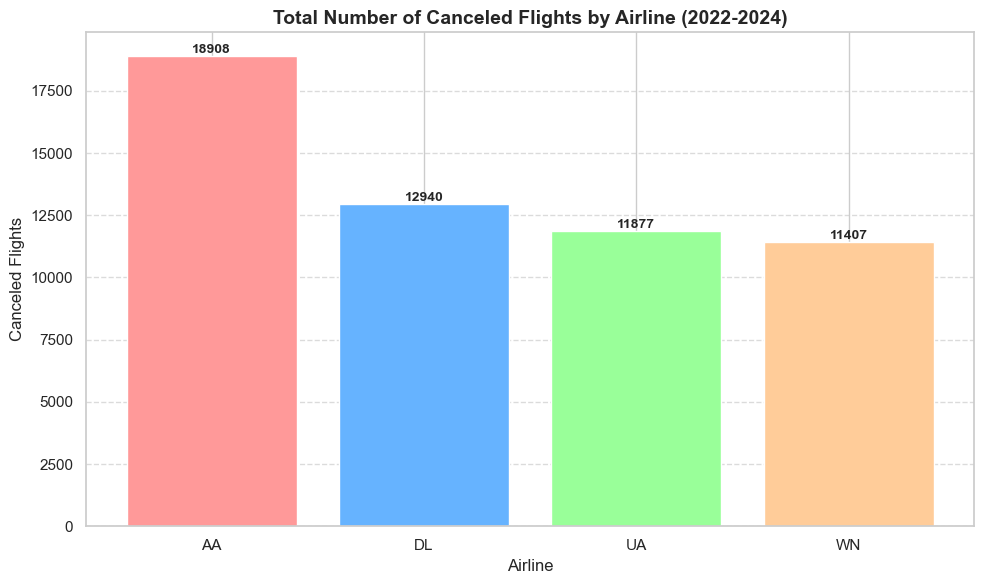

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Convert the 'year' column to integer, handling any potential conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter the data for the years 2022 to 2024
df_filtered = df[(df['year'] >= 2022) & (df['year'] <= 2024)]

# List of airlines to consider
airlines = ['AA', 'UA', 'DL', 'WN']

# Calculate the total number of canceled flights for each airline
canceled_flights_by_airline = df_filtered[df_filtered['carrier'].isin(airlines)].groupby('carrier')['arr_cancelled'].sum()

# Sort the airlines by canceled flights in descending order
canceled_flights_by_airline = canceled_flights_by_airline.sort_values(ascending=False)

# Define colors for the bars
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(canceled_flights_by_airline.index, canceled_flights_by_airline.values, color=colors)

# Add numbers on top of each bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, fontweight='bold')

plt.title('Total Number of Canceled Flights by Airline (2022-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Canceled Flights', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

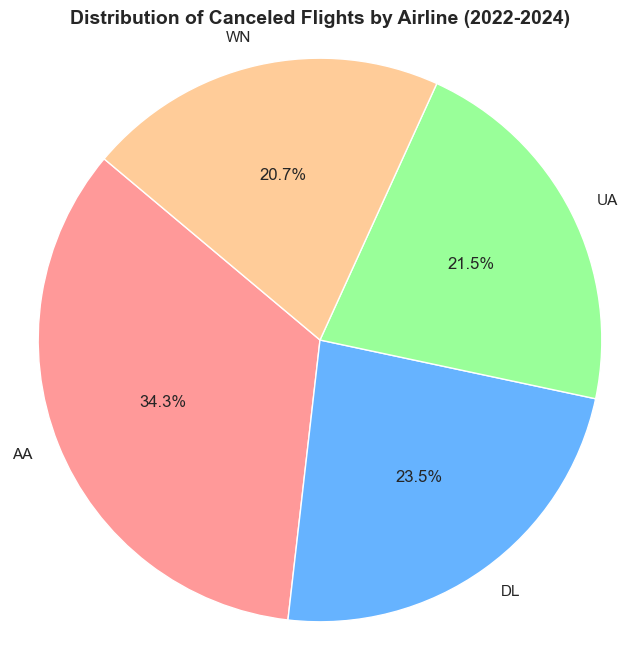

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Convert the 'year' column to integer, handling any potential conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter the data for the years 2022 to 2024
df_filtered = df[(df['year'] >= 2022) & (df['year'] <= 2024)]

# List of airlines to consider
airlines = ['AA', 'UA', 'DL', 'WN']

# Calculate the total number of canceled flights for each airline
canceled_flights_by_airline = df_filtered[df_filtered['carrier'].isin(airlines)].groupby('carrier')['arr_cancelled'].sum()

# Define colors for the pie chart
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Plot the results as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(canceled_flights_by_airline, labels=canceled_flights_by_airline.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Canceled Flights by Airline (2022-2024)', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

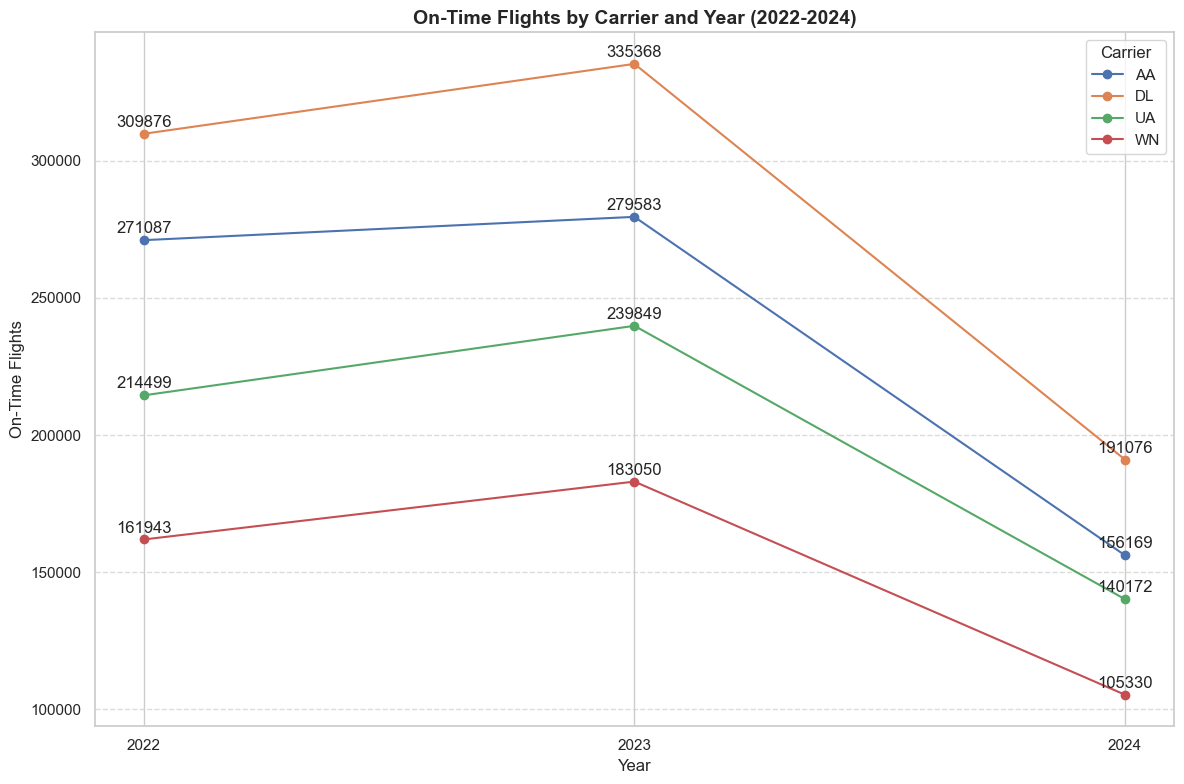

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Convert the 'year' column to integer, handling any potential conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Calculate the number of on-time flights for each record
df['on_time_flights'] = df['arr_flights'] - df['arr_del15']

# List of airlines to consider
airlines = ['AA', 'UA', 'DL', 'WN']

# Filter the data for the specified airlines
df_filtered = df[df['carrier'].isin(airlines)]

# Group by carrier and year, then sum the on-time flights
on_time_flights_by_carrier_year = df_filtered.groupby(['carrier', 'year'])['on_time_flights'].sum().unstack()

# Plot the results
plt.figure(figsize=(12, 8))

# Plot each carrier's data
for carrier in on_time_flights_by_carrier_year.index:
  plt.plot(on_time_flights_by_carrier_year.columns, on_time_flights_by_carrier_year.loc[carrier], marker='o', label=carrier)
  # Annotate each point with its value
  for year in on_time_flights_by_carrier_year.columns:
      value = on_time_flights_by_carrier_year.loc[carrier, year]
      plt.annotate(f'{int(value)}', xy=(year, value), textcoords='offset points', xytext=(0, 5), ha='center')

plt.title('On-Time Flights by Carrier and Year (2022-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('On-Time Flights', fontsize=12)
plt.xticks(on_time_flights_by_carrier_year.columns)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Carrier')
plt.tight_layout()
plt.show()

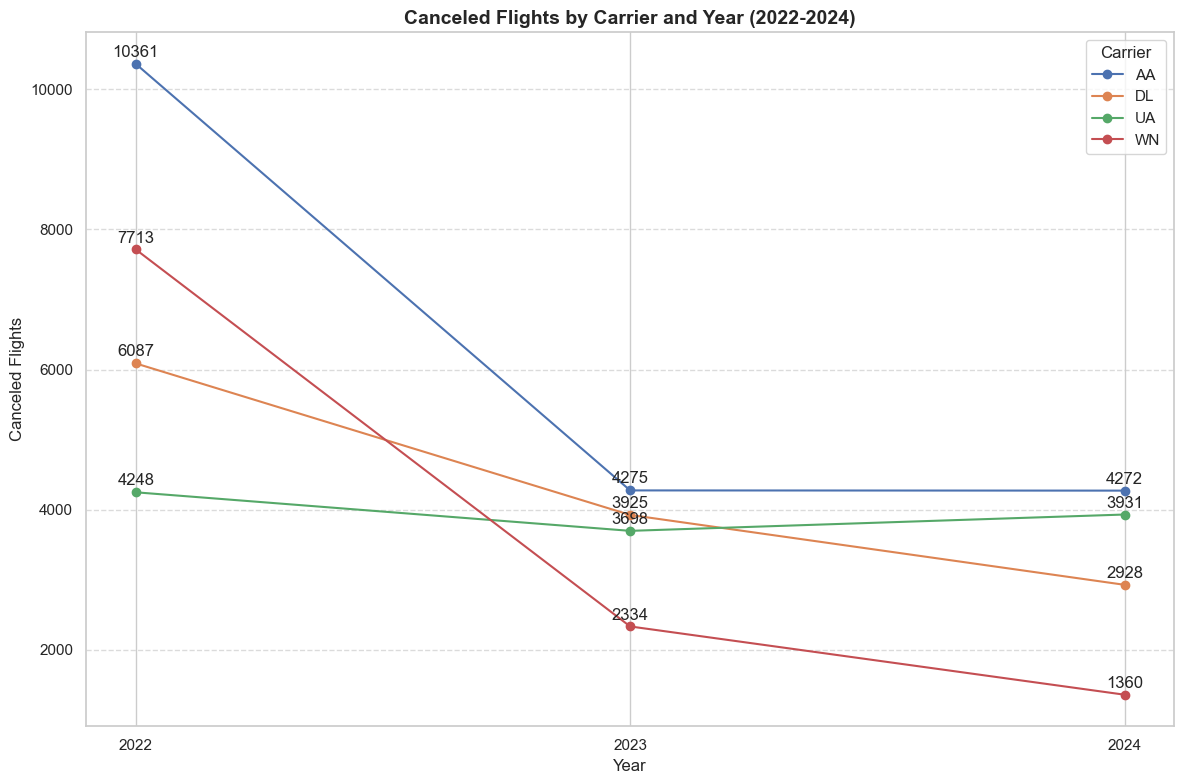

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Convert the 'year' column to integer, handling any potential conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# List of airlines to consider
airlines = ['AA', 'UA', 'DL', 'WN']

# Filter the data for the specified airlines
df_filtered = df[df['carrier'].isin(airlines)]

# Group by carrier and year, then sum the canceled flights
canceled_flights_by_carrier_year = df_filtered.groupby(['carrier', 'year'])['arr_cancelled'].sum().unstack()

# Plot the results
plt.figure(figsize=(12, 8))

# Plot each carrier's data
for carrier in canceled_flights_by_carrier_year.index:
  plt.plot(canceled_flights_by_carrier_year.columns, canceled_flights_by_carrier_year.loc[carrier], marker='o', label=carrier)
  # Annotate each point with its value
  for year in canceled_flights_by_carrier_year.columns:
      value = canceled_flights_by_carrier_year.loc[carrier, year]
      plt.annotate(f'{int(value)}', xy=(year, value), textcoords='offset points', xytext=(0, 5), ha='center')

plt.title('Canceled Flights by Carrier and Year (2022-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Canceled Flights', fontsize=12)
plt.xticks(canceled_flights_by_carrier_year.columns)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Carrier')
plt.tight_layout()
plt.show()

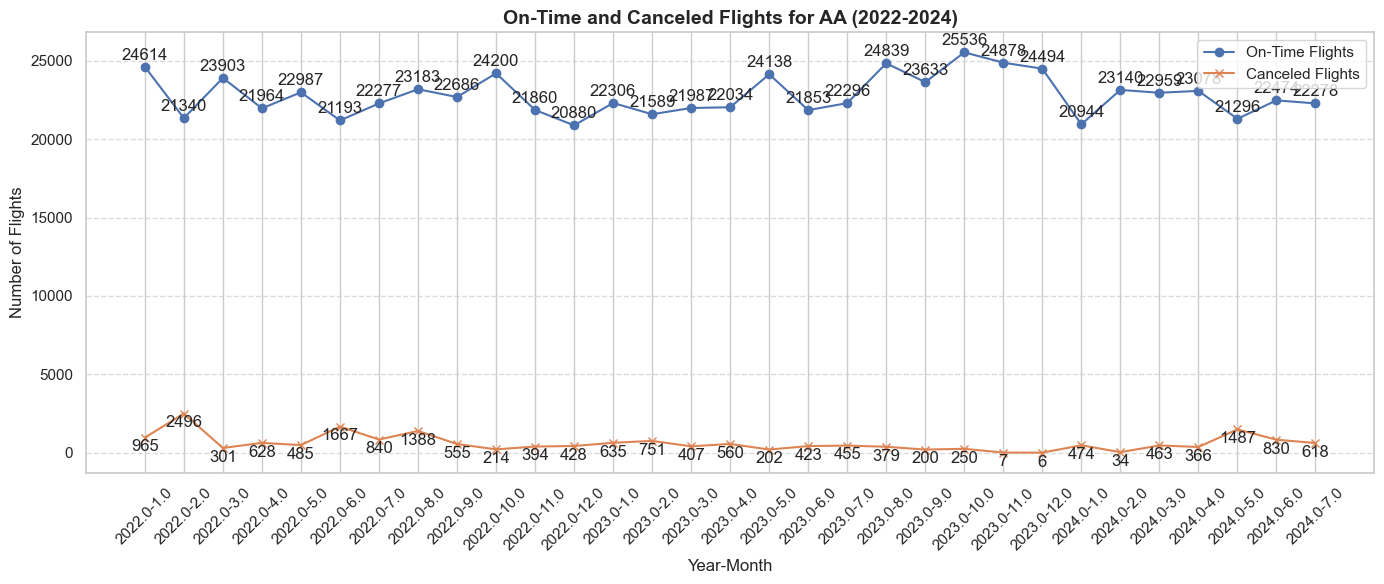

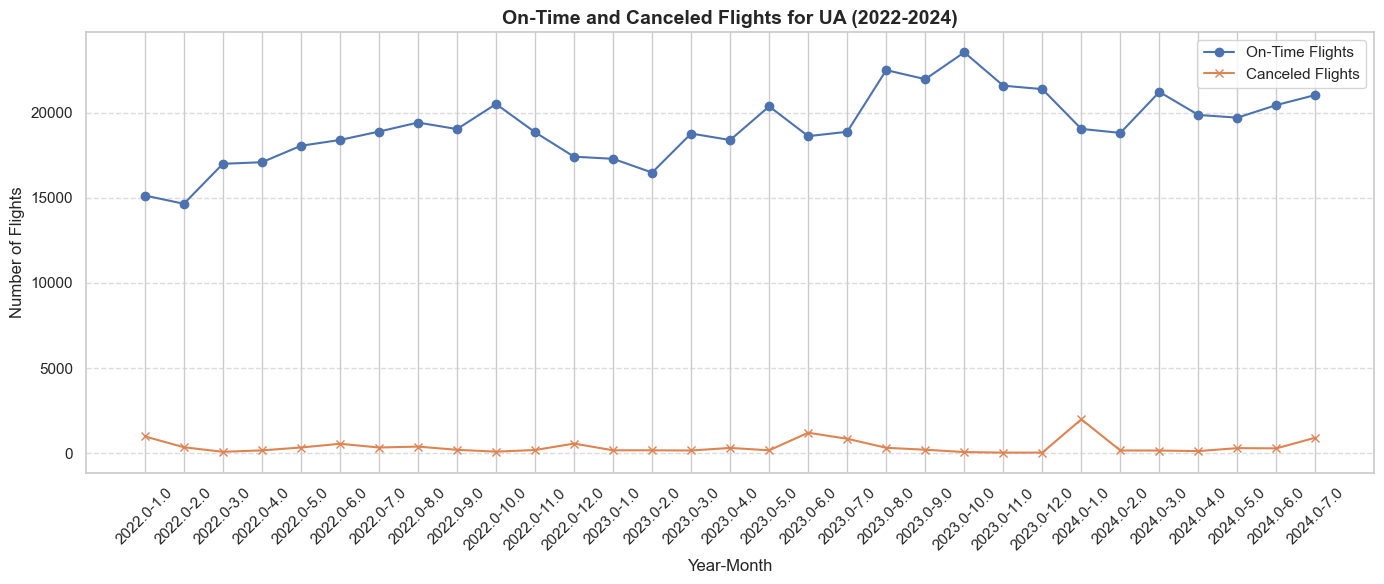

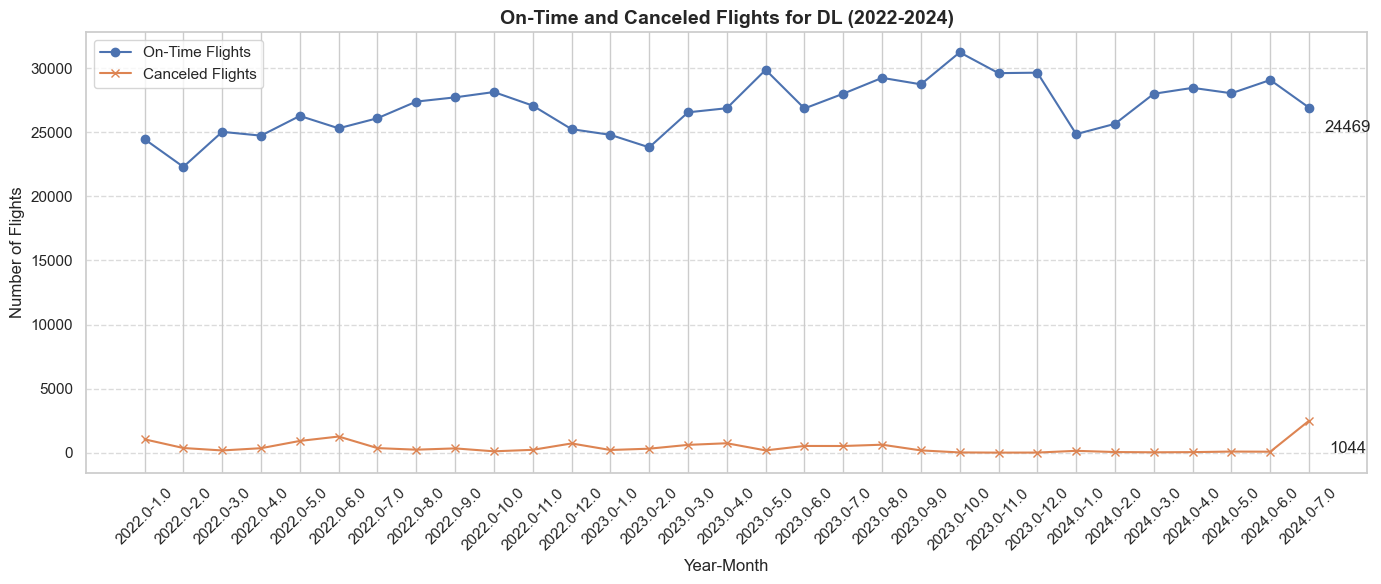

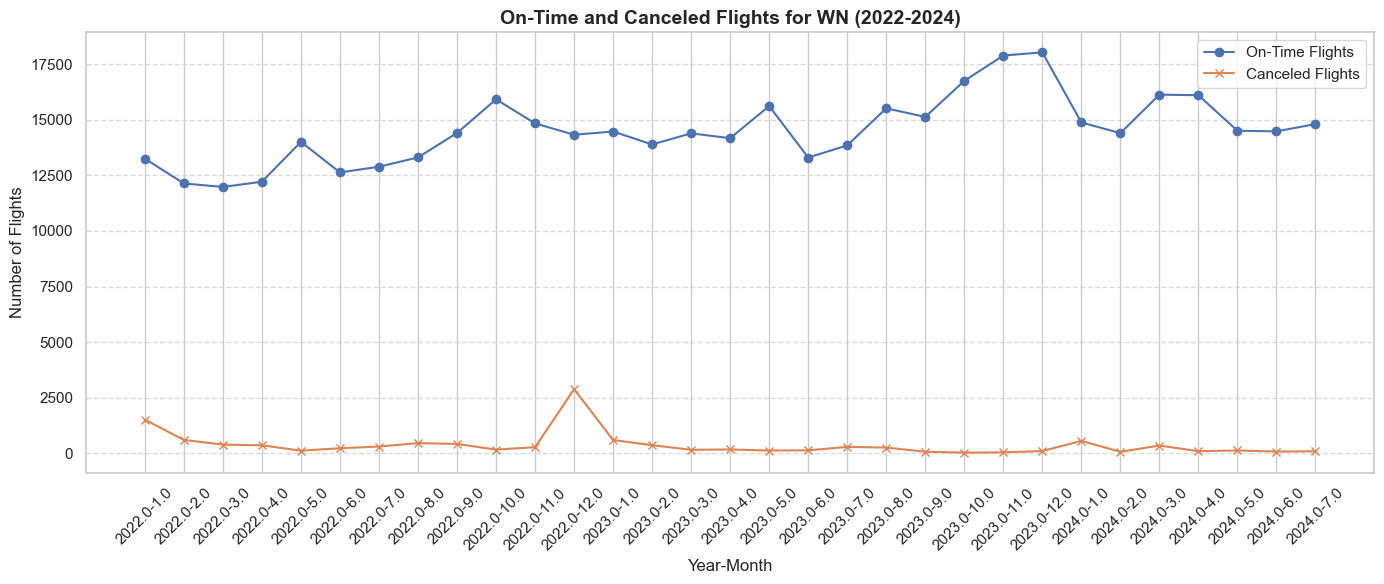

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Convert the 'year' and 'month' columns to integer, handling any potential conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')

# Calculate the number of on-time flights for each record
df['on_time_flights'] = df['arr_flights'] - df['arr_del15']

# List of airlines to consider
airlines = ['AA', 'UA', 'DL', 'WN']

# Filter the data for the specified airlines
df_filtered = df[df['carrier'].isin(airlines)]

# Group by carrier, year, and month, then sum the on-time and canceled flights
grouped = df_filtered.groupby(['carrier', 'year', 'month']).agg({
  'on_time_flights': 'sum',
  'arr_cancelled': 'sum'
}).reset_index()

# Plot the results
for carrier in airlines:
  carrier_data = grouped[grouped['carrier'] == carrier]
  
  plt.figure(figsize=(14, 6))
  
  # Plot on-time flights
  plt.plot(carrier_data['year'].astype(str) + '-' + carrier_data['month'].astype(str), 
           carrier_data['on_time_flights'], marker='o', label='On-Time Flights')
  
  # Plot canceled flights
  plt.plot(carrier_data['year'].astype(str) + '-' + carrier_data['month'].astype(str), 
           carrier_data['arr_cancelled'], marker='x', label='Canceled Flights')
  
  # Annotate each point with its value
  for i, row in carrier_data.iterrows():
      plt.annotate(f'{int(row["on_time_flights"])}', 
                   xy=(i, row['on_time_flights']), textcoords='offset points', xytext=(0, 5), ha='center')
      plt.annotate(f'{int(row["arr_cancelled"])}', 
                   xy=(i, row['arr_cancelled']), textcoords='offset points', xytext=(0, -10), ha='center')
  
  plt.title(f'On-Time and Canceled Flights for {carrier} (2022-2024)', fontsize=14, fontweight='bold')
  plt.xlabel('Year-Month', fontsize=12)
  plt.ylabel('Number of Flights', fontsize=12)
  plt.xticks(rotation=45)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.legend()
  plt.tight_layout()
  plt.show()

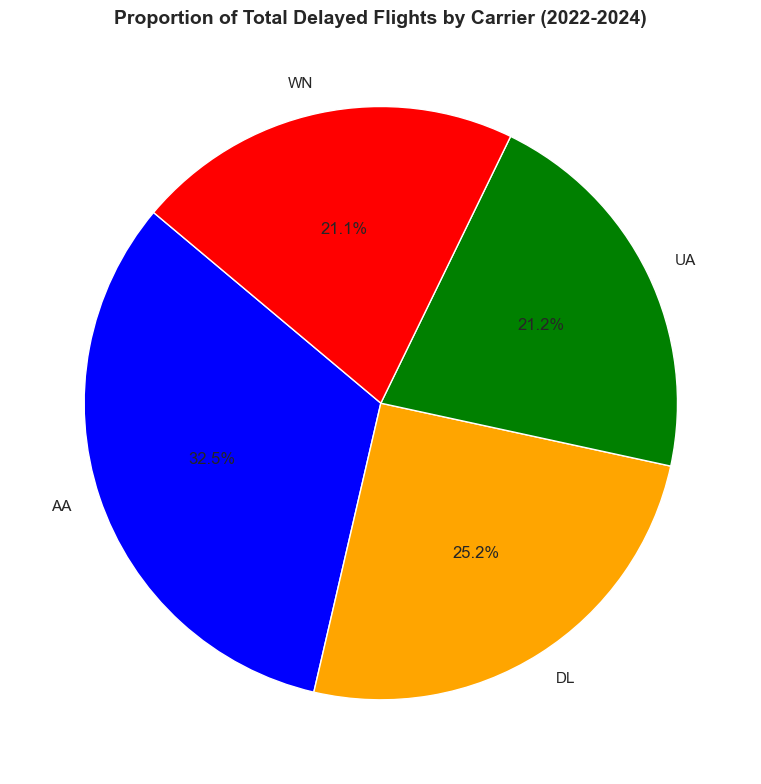

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Convert the 'year' column to integer, handling any potential conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# List of airlines to consider
airlines = ['AA', 'UA', 'DL', 'WN']

# Filter the data for the specified airlines and years
df_filtered = df[(df['carrier'].isin(airlines)) & (df['year'].between(2022, 2024))]

# Group by carrier and year, then sum the delayed flights
delayed_flights_by_carrier_year = df_filtered.groupby(['carrier', 'year'])['arr_del15'].sum().unstack()

# Calculate the total delayed flights for each carrier over the period
total_delayed_flights_by_carrier = delayed_flights_by_carrier_year.sum(axis=1)

# Plot the results as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_delayed_flights_by_carrier, labels=total_delayed_flights_by_carrier.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red'])

plt.title('Proportion of Total Delayed Flights by Carrier (2022-2024)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

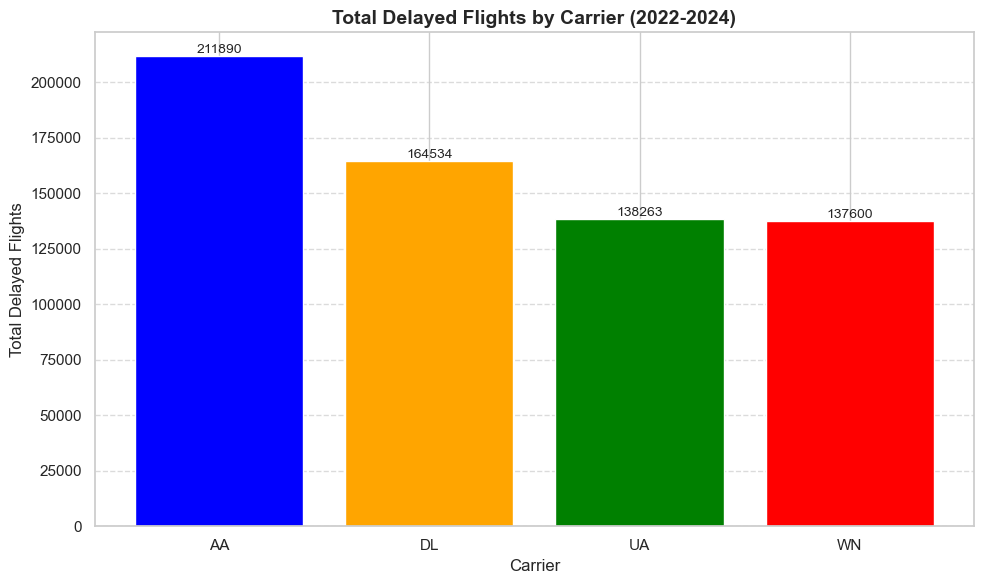

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Convert the 'year' column to integer, handling any potential conversion errors
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# List of airlines to consider
airlines = ['AA', 'UA', 'DL', 'WN']

# Filter the data for the specified airlines and years
df_filtered = df[(df['carrier'].isin(airlines)) & (df['year'].between(2022, 2024))]

# Group by carrier and year, then sum the delayed flights
delayed_flights_by_carrier_year = df_filtered.groupby(['carrier', 'year'])['arr_del15'].sum().unstack()

# Calculate the total delayed flights for each carrier over the period
total_delayed_flights_by_carrier = delayed_flights_by_carrier_year.sum(axis=1)

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(total_delayed_flights_by_carrier.index, total_delayed_flights_by_carrier, color=['blue', 'orange', 'green', 'red'])

# Annotate each bar with the total number of delayed flights
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.title('Total Delayed Flights by Carrier (2022-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Carrier', fontsize=12)
plt.ylabel('Total Delayed Flights', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

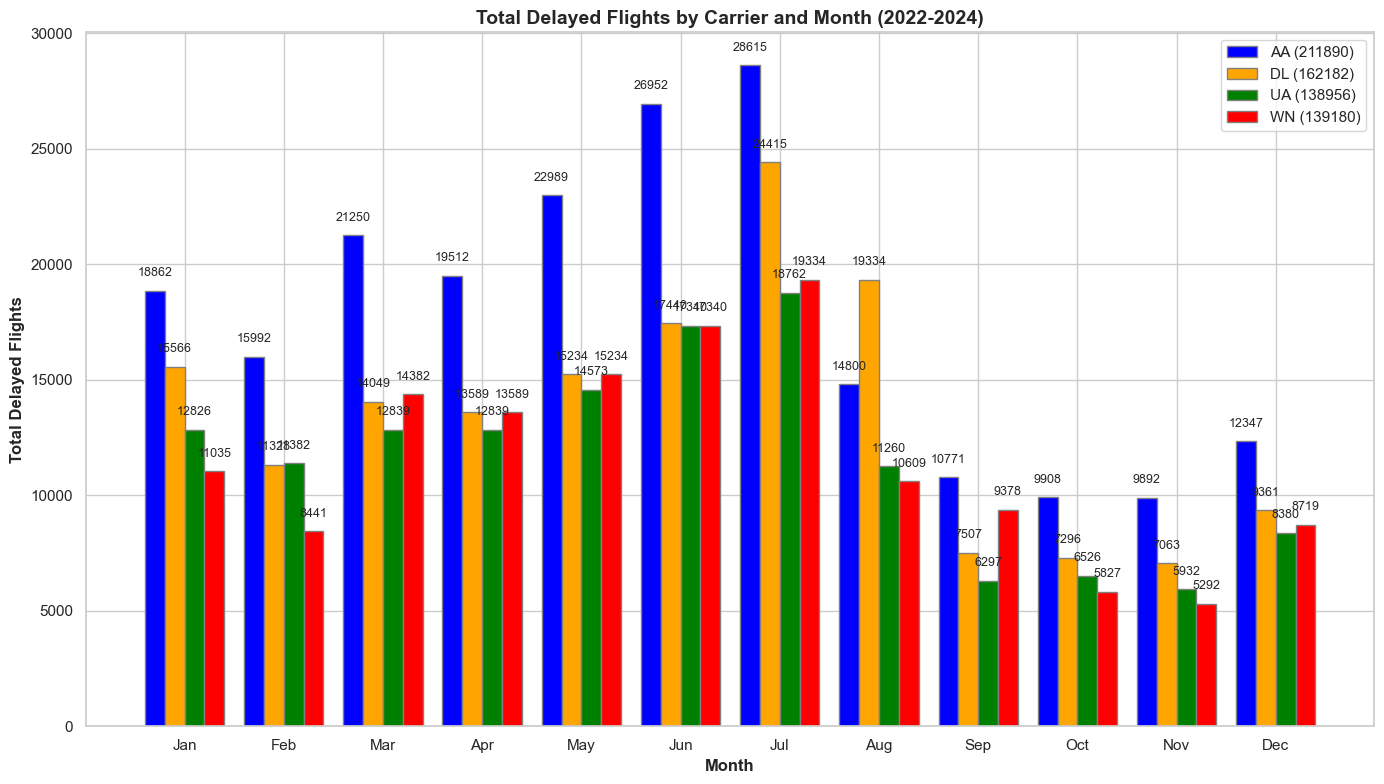

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data based on the uploaded document
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'AA': [18862, 15992, 21250, 19512, 22989, 26952, 28615, 14800, 10771, 9908, 9892, 12347],
    'DL': [15566, 11328, 14049, 13589, 15234, 17440, 24415, 19334, 7507, 7296, 7063, 9361],
    'UA': [12826, 11382, 12839, 12839, 14573, 17340, 18762, 11260, 6297, 6526, 5932, 8380],
    'WN': [11035, 8441, 14382, 13589, 15234, 17340, 19334, 10609, 9378, 5827, 5292, 8719]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate total delayed flights for each carrier
totals = {carrier: df[carrier].sum() for carrier in df.columns if carrier != 'Month'}

# Set the position of the bars on the x-axis
bar_width = 0.2
r1 = np.arange(len(df['Month']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot the bars
plt.figure(figsize=(14, 8))
plt.bar(r1, df['AA'], color='blue', width=bar_width, edgecolor='grey', label=f'AA ({totals["AA"]})')
plt.bar(r2, df['DL'], color='orange', width=bar_width, edgecolor='grey', label=f'DL ({totals["DL"]})')
plt.bar(r3, df['UA'], color='green', width=bar_width, edgecolor='grey', label=f'UA ({totals["UA"]})')
plt.bar(r4, df['WN'], color='red', width=bar_width, edgecolor='grey', label=f'WN ({totals["WN"]})')

# Add labels on top of each bar
for i, (aa, dl, ua, wn) in enumerate(zip(df['AA'], df['DL'], df['UA'], df['WN'])):
    plt.text(r1[i], aa + 500, str(aa), ha='center', va='bottom', fontsize=9)
    plt.text(r2[i], dl + 500, str(dl), ha='center', va='bottom', fontsize=9)
    plt.text(r3[i], ua + 500, str(ua), ha='center', va='bottom', fontsize=9)
    plt.text(r4[i], wn + 500, str(wn), ha='center', va='bottom', fontsize=9)

# Add labels and title
plt.xlabel('Month', fontweight='bold', fontsize=12)
plt.ylabel('Total Delayed Flights', fontweight='bold', fontsize=12)
plt.title('Total Delayed Flights by Carrier and Month (2022-2024)', fontsize=14, fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(df['Month']))], df['Month'])
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# List of airlines to consider
airlines = ['AA', 'UA', 'DL', 'WN']

# Filter the data for the specified airlines
df_filtered = df[df['carrier'].isin(airlines)]

# Group by carrier and calculate the total flights and delayed flights
grouped = df_filtered.groupby('carrier').agg({
    'total_flights': 'sum',
    'arr_del15': 'sum'
})

# Calculate the percentage of delayed flights
grouped['delay_percentage'] = (grouped['arr_del15'] / grouped['total_flights']) * 100

# Print the results
print(grouped[['delay_percentage']])

         delay_percentage
carrier                  
AA              18.380640
DL              13.938256
UA              15.625392
WN              18.631984


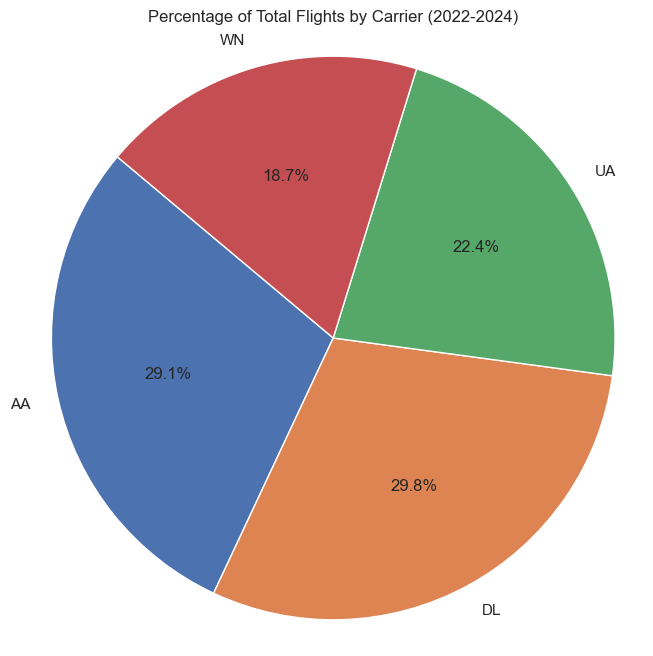

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Convert the 'year' column to integers
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter the data for the years 2022 to 2024
df_filtered = df[(df['year'] >= 2022) & (df['year'] <= 2024)]

# Calculate the total number of flights for all carriers
total_flights_all_carriers = df_filtered['total_flights'].sum()

# Group by carrier and sum the total flights
total_flights_by_carrier = df_filtered.groupby('carrier')['total_flights'].sum()

# Calculate the percentage of total flights for each carrier
percentage_by_carrier = (total_flights_by_carrier / total_flights_all_carriers) * 100

# Filter for the specific airlines of interest
airlines_of_interest = ['AA', 'UA', 'DL', 'WN']
percentage_by_carrier_filtered = percentage_by_carrier[percentage_by_carrier.index.isin(airlines_of_interest)]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage_by_carrier_filtered, labels=percentage_by_carrier_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Flights by Carrier (2022-2024)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

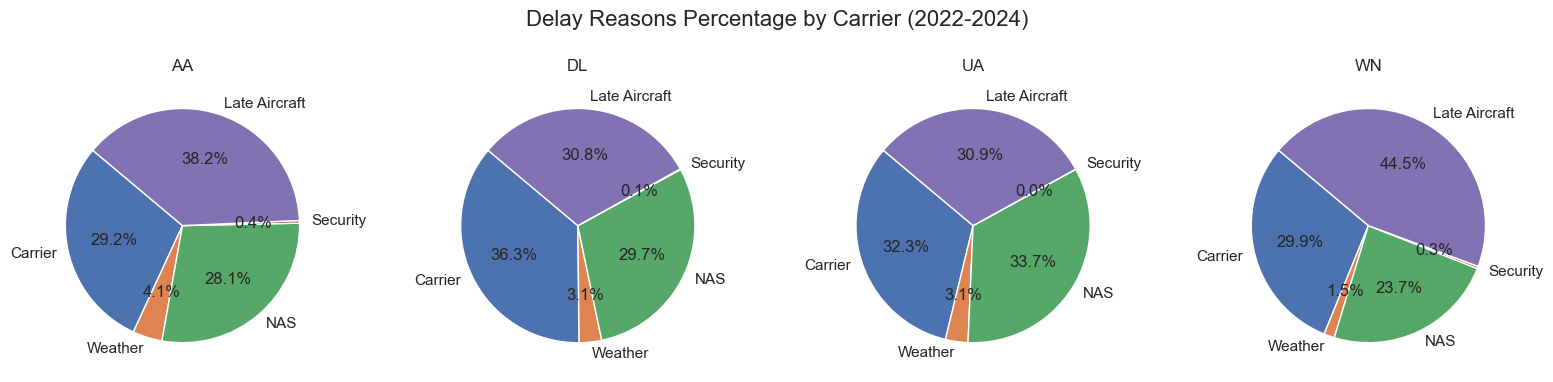

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
df = pd.read_csv(file_path)

# Convert the 'year' column to integers
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Convert delay columns to numeric
delay_columns = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
df[delay_columns] = df[delay_columns].apply(pd.to_numeric, errors='coerce')

# Filter the data for the years 2022 to 2024
df_filtered = df[(df['year'] >= 2022) & (df['year'] <= 2024)]

# Group by carrier and sum the delay counts
delay_sums = df_filtered.groupby('carrier')[delay_columns].sum()

# Calculate the total delays for each carrier
delay_sums['total_delays'] = delay_sums.sum(axis=1)

# Calculate the percentage of each delay reason for each carrier
for column in delay_columns:
  delay_sums[column + '_pct'] = (delay_sums[column] / delay_sums['total_delays']) * 100

# Plot the pie charts in a single figure
num_carriers = len(delay_sums.index)
fig, axes = plt.subplots(1, num_carriers, figsize=(16,4))

# Ensure axes is iterable
if num_carriers == 1:
  axes = [axes]

# Plot each carrier's pie chart
for ax, carrier in zip(axes, delay_sums.index):
  percentages = delay_sums.loc[carrier, [col + '_pct' for col in delay_columns]]
  labels = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
  
  ax.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
  ax.set_title(f'{carrier}')

# Set a common title
plt.suptitle('Delay Reasons Percentage by Carrier (2022-2024)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\3321354551.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='arr_del15', y='airport', data=delayed_flights, palette=palette)


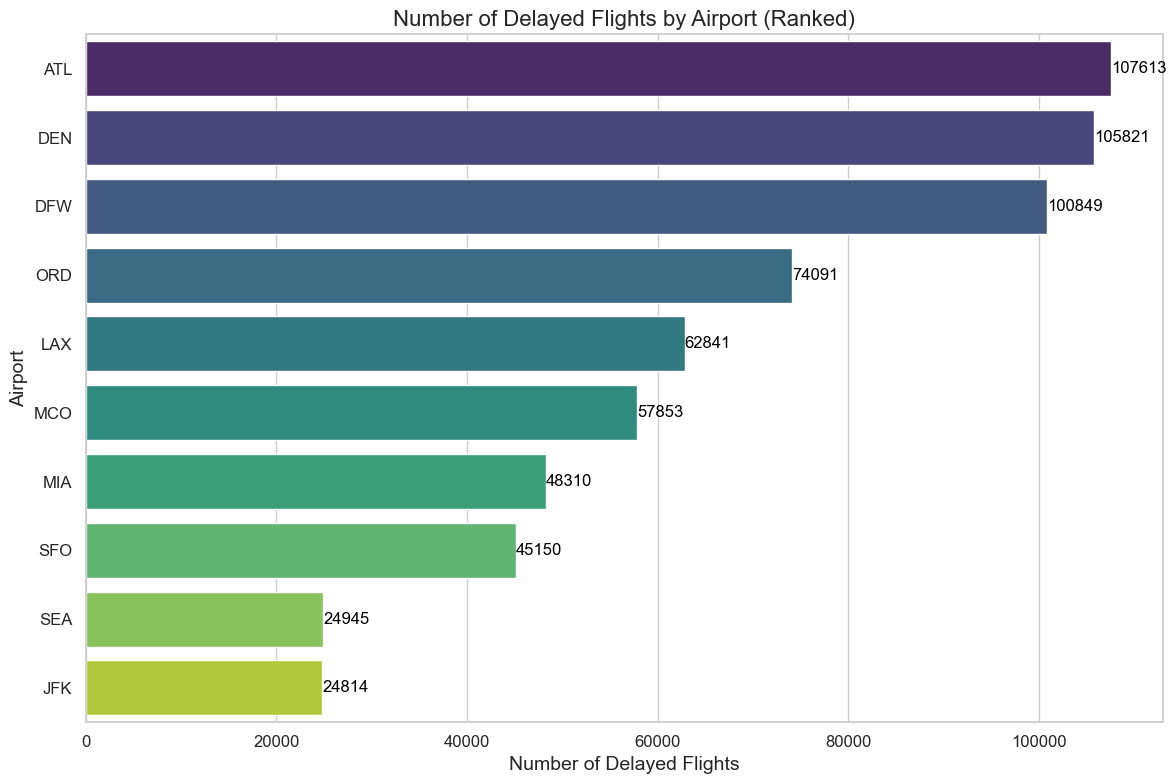

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
data = pd.read_csv(file_path)

# List of specified airports
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "SEA", "MCO", "MIA"]

# Filter the data for the specified airports
filtered_data = data[data['airport'].isin(airports)]

# Calculate the total number of delayed flights for each airport
delayed_flights = filtered_data.groupby('airport')['arr_del15'].sum().reset_index()

# Sort the data by the number of delayed flights in descending order
delayed_flights = delayed_flights.sort_values(by='arr_del15', ascending=False)

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(delayed_flights))

# Plot the results
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='arr_del15', y='airport', data=delayed_flights, palette=palette)
plt.title('Number of Delayed Flights by Airport (Ranked)', fontsize=16)
plt.xlabel('Number of Delayed Flights', fontsize=14)
plt.ylabel('Airport', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate each bar with the number of delayed flights
for index, value in enumerate(delayed_flights['arr_del15']):
    ax.text(value, index, f'{int(value)}', color='black', ha="left", va="center", fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\3419953554.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='delay_percentage', y='airport', data=merged_data, palette=palette)


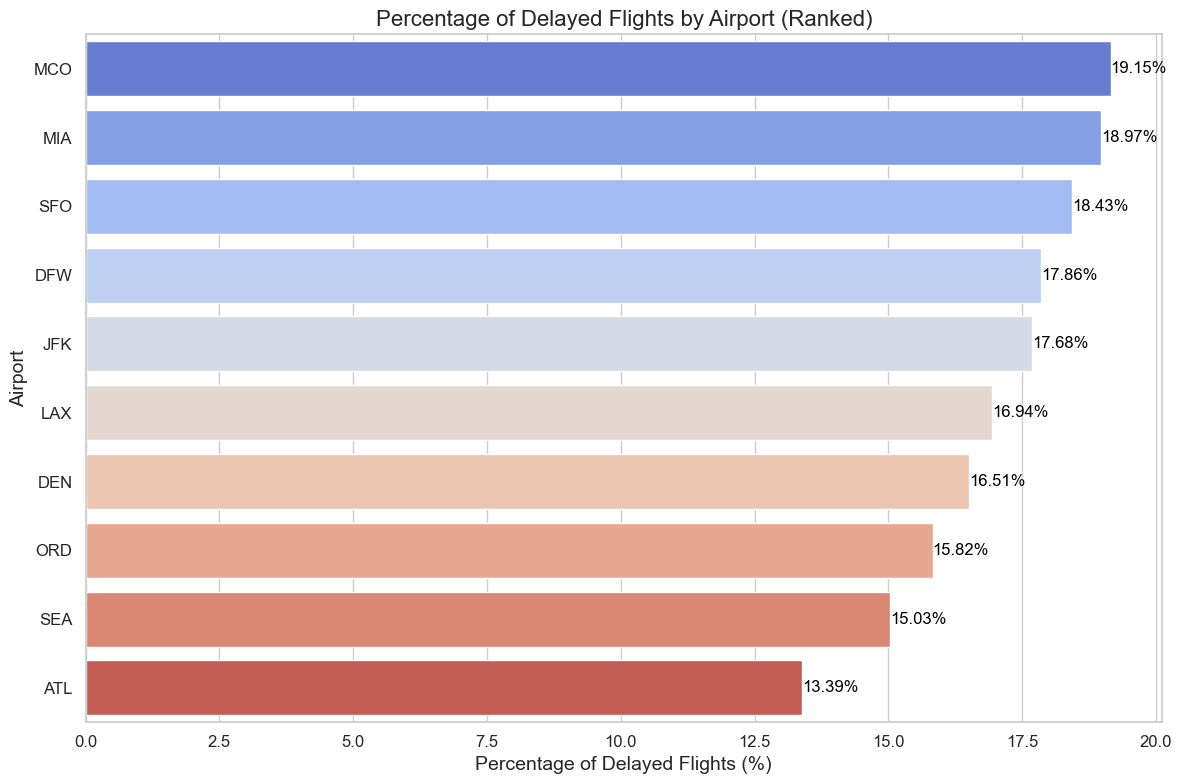

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
data = pd.read_csv(file_path)

# List of specified airports
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "SEA", "MCO", "MIA"]

# Filter the data for the specified airports
filtered_data = data[data['airport'].isin(airports)]

# Calculate the total number of delayed flights and total flights for each airport
delayed_flights = filtered_data.groupby('airport')['arr_del15'].sum().reset_index()
total_flights = filtered_data.groupby('airport')['total_flights'].sum().reset_index()

# Merge the two dataframes on the airport column
merged_data = pd.merge(delayed_flights, total_flights, on='airport')

# Calculate the percentage of delayed flights
merged_data['delay_percentage'] = (merged_data['arr_del15'] / merged_data['total_flights']) * 100

# Sort the data by the percentage of delayed flights in descending order
merged_data = merged_data.sort_values(by='delay_percentage', ascending=False)

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", len(merged_data))

# Plot the percentage of delayed flights
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='delay_percentage', y='airport', data=merged_data, palette=palette)
plt.title('Percentage of Delayed Flights by Airport (Ranked)', fontsize=16)
plt.xlabel('Percentage of Delayed Flights (%)', fontsize=14)
plt.ylabel('Airport', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate each bar with the percentage of delayed flights
for index, value in enumerate(merged_data['delay_percentage']):
    ax.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2951533717.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='arr_cancelled', y='airport', data=canceled_flights, palette=palette)


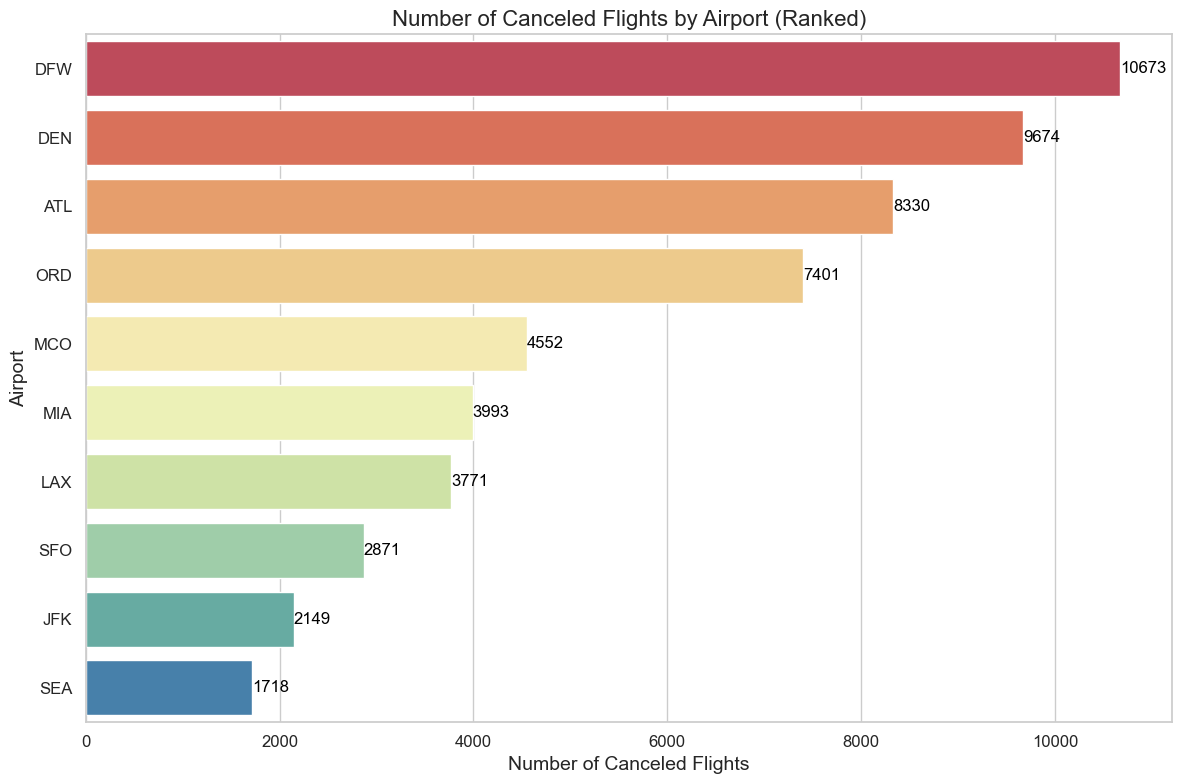

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
data = pd.read_csv(file_path)

# List of specified airports
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "SEA", "MCO", "MIA"]

# Filter the data for the specified airports
filtered_data = data[data['airport'].isin(airports)]

# Calculate the total number of canceled flights for each airport
canceled_flights = filtered_data.groupby('airport')['arr_cancelled'].sum().reset_index()

# Sort the data by the number of canceled flights in descending order
canceled_flights = canceled_flights.sort_values(by='arr_cancelled', ascending=False)

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Spectral", len(canceled_flights))

# Plot the results
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='arr_cancelled', y='airport', data=canceled_flights, palette=palette)
plt.title('Number of Canceled Flights by Airport (Ranked)', fontsize=16)
plt.xlabel('Number of Canceled Flights', fontsize=14)
plt.ylabel('Airport', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate each bar with the number of canceled flights
for index, value in enumerate(canceled_flights['arr_cancelled']):
    ax.text(value, index, f'{int(value)}', color='black', ha="left", va="center", fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\5477675.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='cancel_percentage', y='airport', data=merged_data, palette=palette)


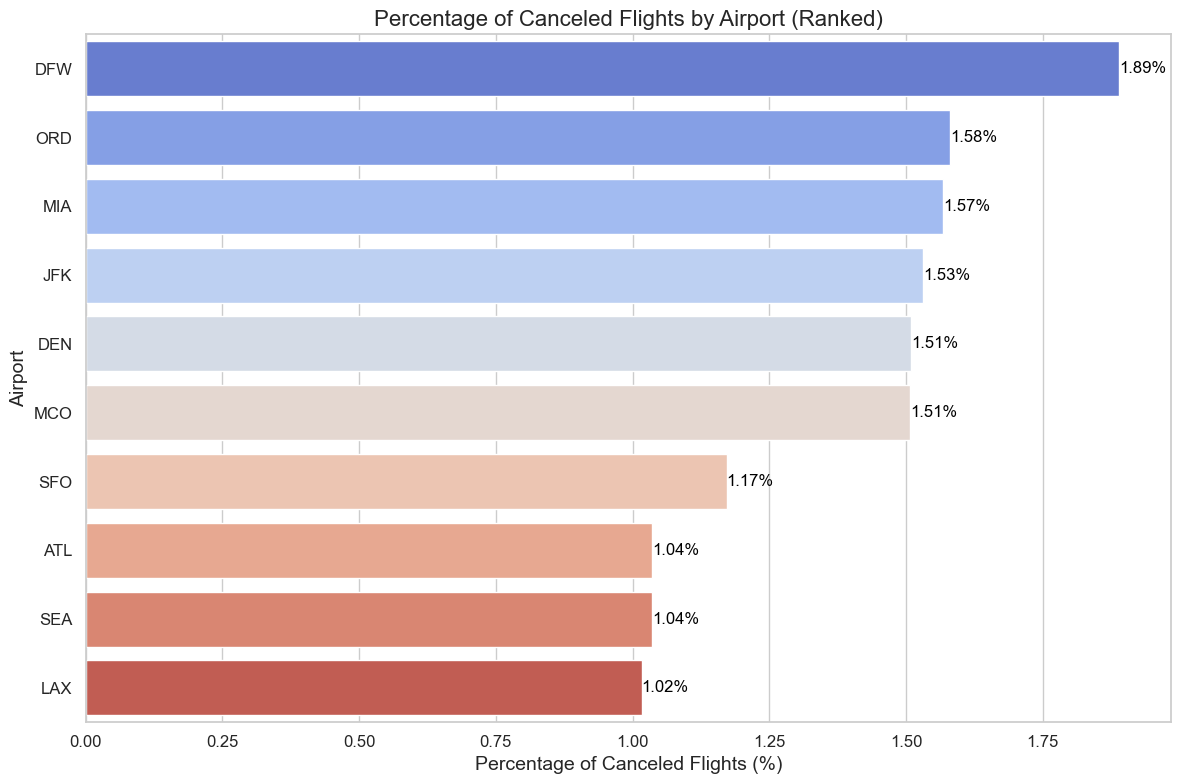

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
data = pd.read_csv(file_path)

# List of specified airports
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "SEA", "MCO", "MIA"]

# Filter the data for the specified airports
filtered_data = data[data['airport'].isin(airports)]

# Calculate the total number of canceled flights and total flights for each airport
canceled_flights = filtered_data.groupby('airport')['arr_cancelled'].sum().reset_index()
total_flights = filtered_data.groupby('airport')['total_flights'].sum().reset_index()

# Merge the two dataframes on the airport column
merged_data = pd.merge(canceled_flights, total_flights, on='airport')

# Calculate the percentage of canceled flights
merged_data['cancel_percentage'] = (merged_data['arr_cancelled'] / merged_data['total_flights']) * 100

# Sort the data by the percentage of canceled flights in descending order
merged_data = merged_data.sort_values(by='cancel_percentage', ascending=False)

# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", len(merged_data))

# Plot the percentage of canceled flights
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='cancel_percentage', y='airport', data=merged_data, palette=palette)
plt.title('Percentage of Canceled Flights by Airport (Ranked)', fontsize=16)
plt.xlabel('Percentage of Canceled Flights (%)', fontsize=14)
plt.ylabel('Airport', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate each bar with the percentage of canceled flights
for index, value in enumerate(merged_data['cancel_percentage']):
    ax.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center", fontsize=12)

plt.tight_layout()
plt.show()

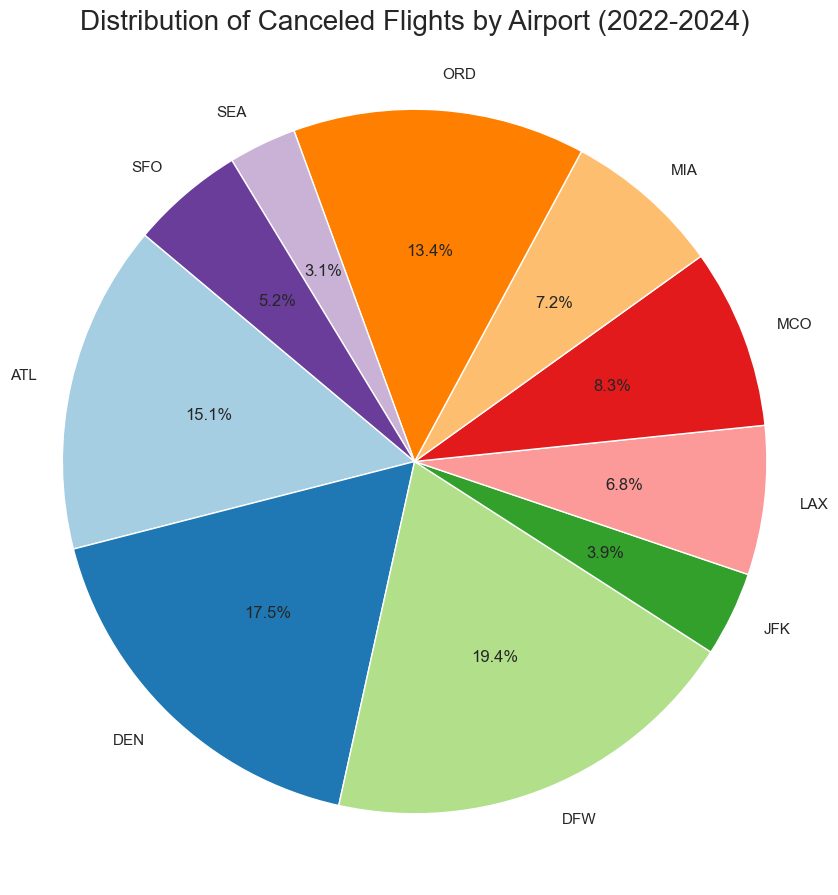

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
data = pd.read_csv(file_path)

# List of specified airports
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "SEA", "MCO", "MIA"]

# Filter the data for the specified airports
filtered_data = data[data['airport'].isin(airports)]

# Calculate the total number of canceled flights for each airport
canceled_flights = filtered_data.groupby('airport')['arr_cancelled'].sum().reset_index()

# Plot a pie chart
plt.figure(figsize=(10, 11))
plt.pie(canceled_flights['arr_cancelled'], labels=canceled_flights['airport'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Canceled Flights by Airport (2022-2024)', fontsize=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

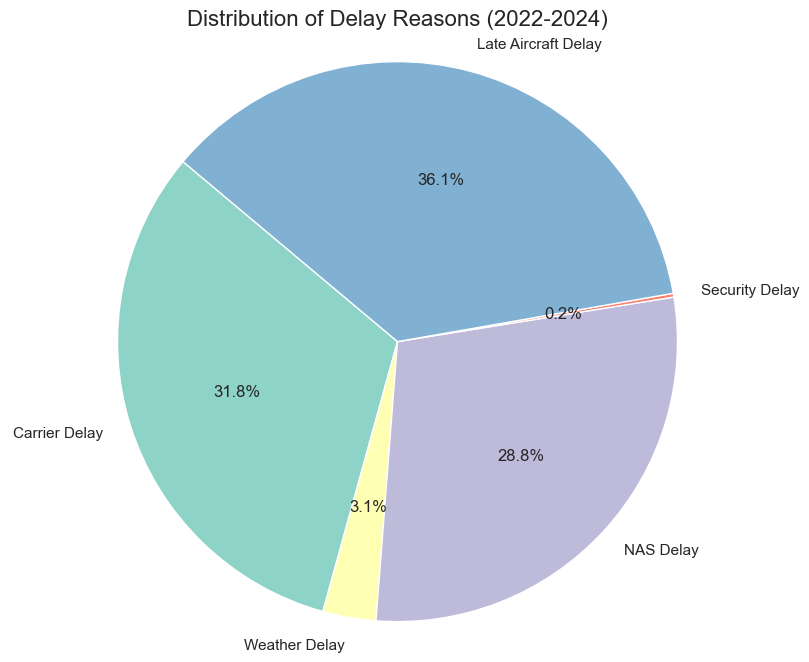

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
data = pd.read_csv(file_path)

# Ensure the relevant columns are numeric
data['carrier_ct'] = pd.to_numeric(data['carrier_ct'], errors='coerce')
data['weather_ct'] = pd.to_numeric(data['weather_ct'], errors='coerce')
data['nas_ct'] = pd.to_numeric(data['nas_ct'], errors='coerce')
data['security_ct'] = pd.to_numeric(data['security_ct'], errors='coerce')
data['late_aircraft_ct'] = pd.to_numeric(data['late_aircraft_ct'], errors='coerce')

# Sum the delay counts for each reason
delay_reasons = {
  'Carrier Delay': data['carrier_ct'].sum(),
  'Weather Delay': data['weather_ct'].sum(),
  'NAS Delay': data['nas_ct'].sum(),
  'Security Delay': data['security_ct'].sum(),
  'Late Aircraft Delay': data['late_aircraft_ct'].sum()
}

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(delay_reasons.values(), labels=delay_reasons.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Delay Reasons (2022-2024)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

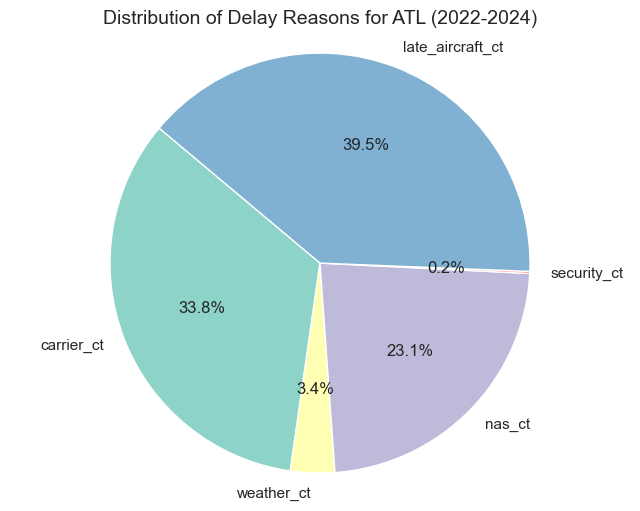

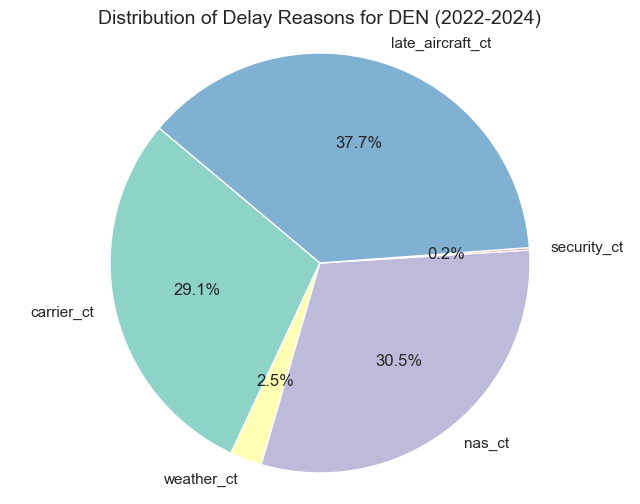

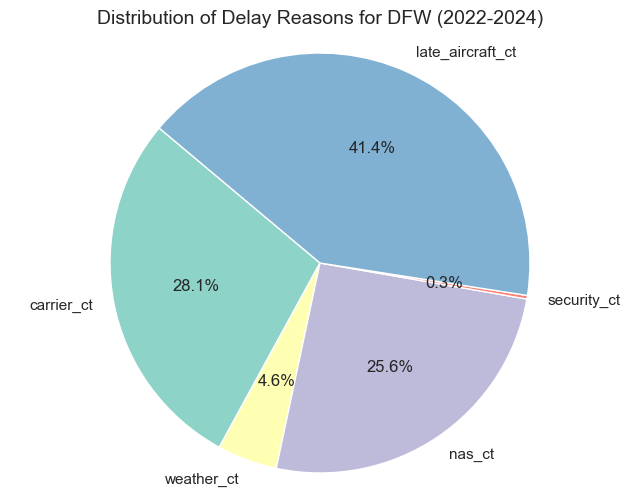

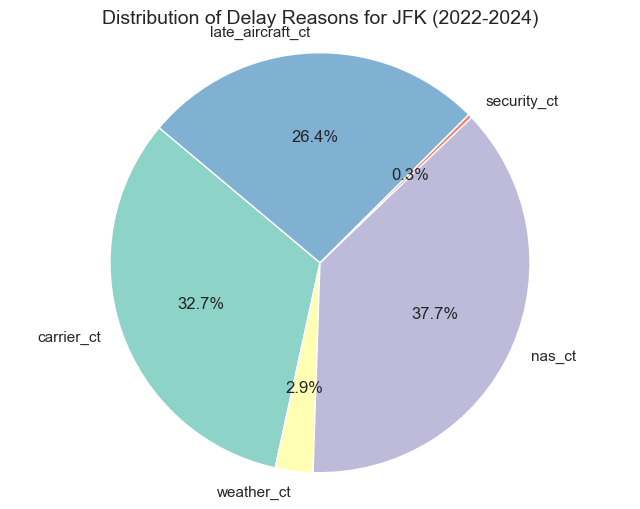

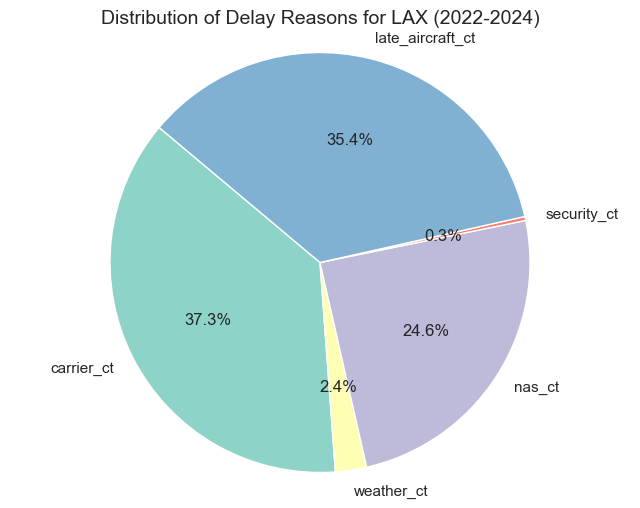

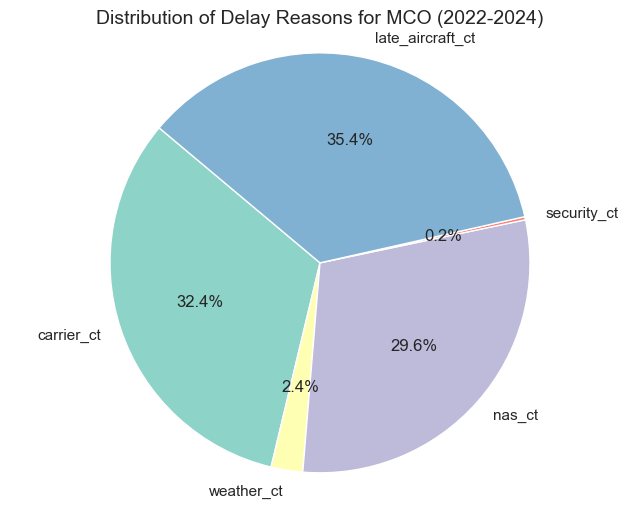

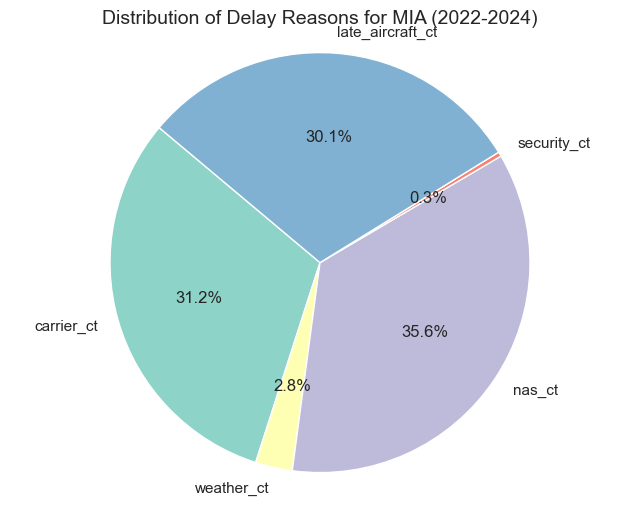

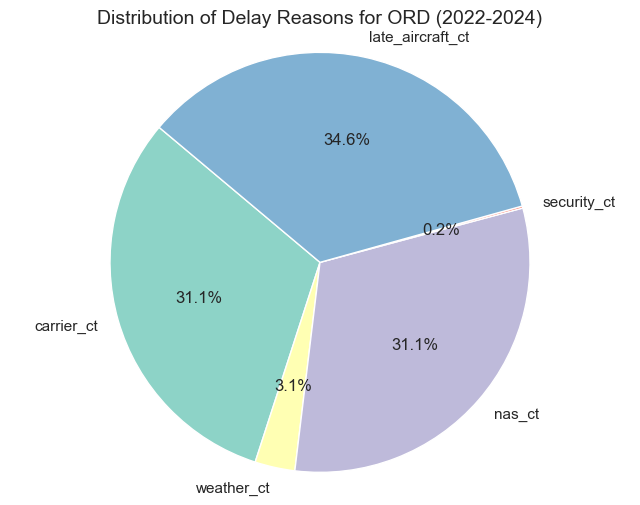

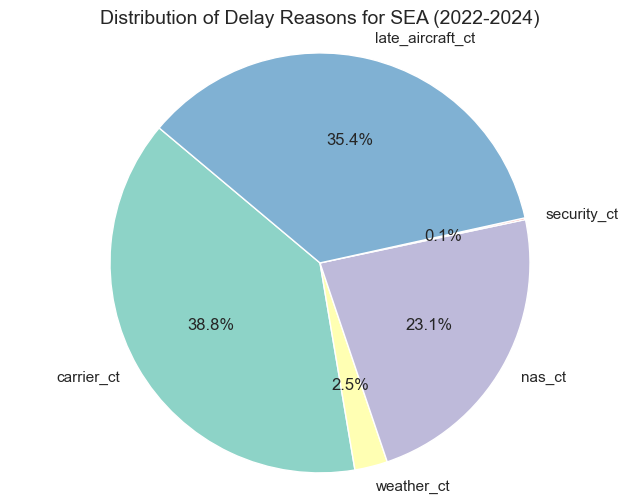

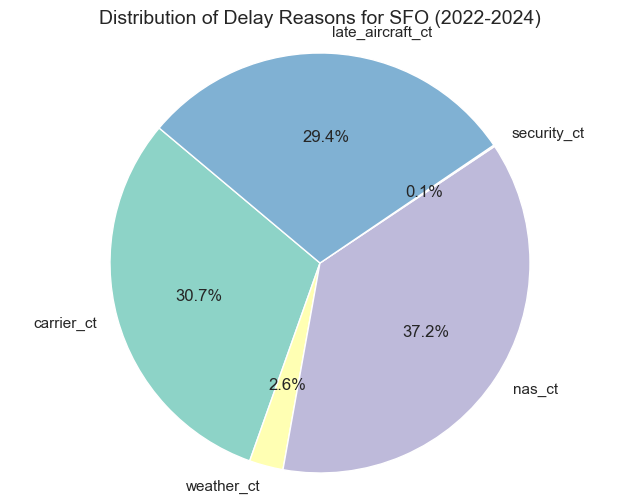

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
data = pd.read_csv(file_path)

# Ensure the relevant columns are numeric
data['carrier_ct'] = pd.to_numeric(data['carrier_ct'], errors='coerce')
data['weather_ct'] = pd.to_numeric(data['weather_ct'], errors='coerce')
data['nas_ct'] = pd.to_numeric(data['nas_ct'], errors='coerce')
data['security_ct'] = pd.to_numeric(data['security_ct'], errors='coerce')
data['late_aircraft_ct'] = pd.to_numeric(data['late_aircraft_ct'], errors='coerce')

# List of specified airports
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "SEA", "MCO", "MIA"]

# Filter the data for the specified airports
filtered_data = data[data['airport'].isin(airports)]

# Group by airport and sum the delay reasons
grouped_data = filtered_data.groupby('airport')[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

# Plot a pie chart for each airport
for airport, delays in grouped_data.iterrows():
  plt.figure(figsize=(8, 6))
  plt.pie(delays, labels=delays.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
  plt.title(f'Distribution of Delay Reasons for {airport} (2022-2024)', fontsize=14)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.show()

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2816863500.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


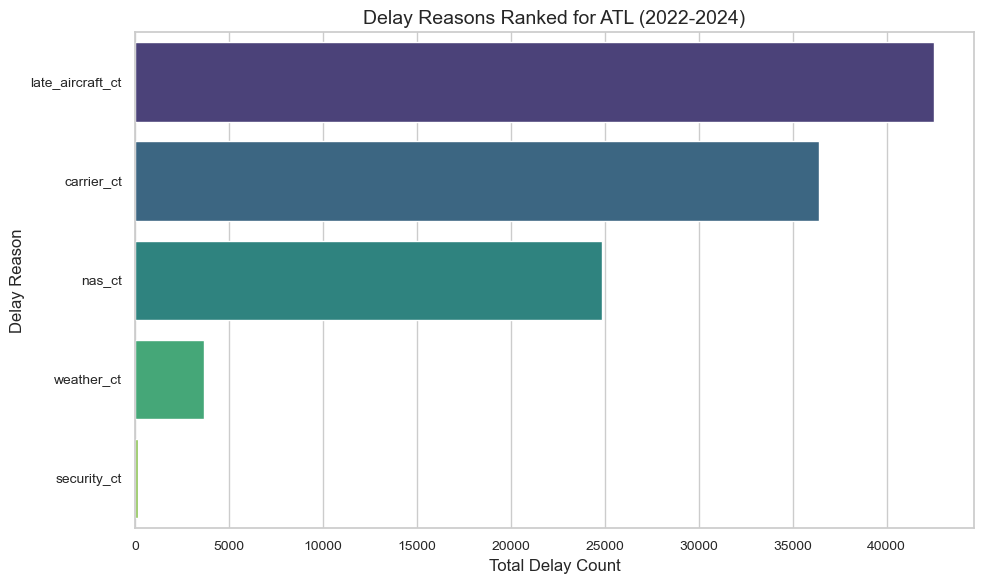

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2816863500.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


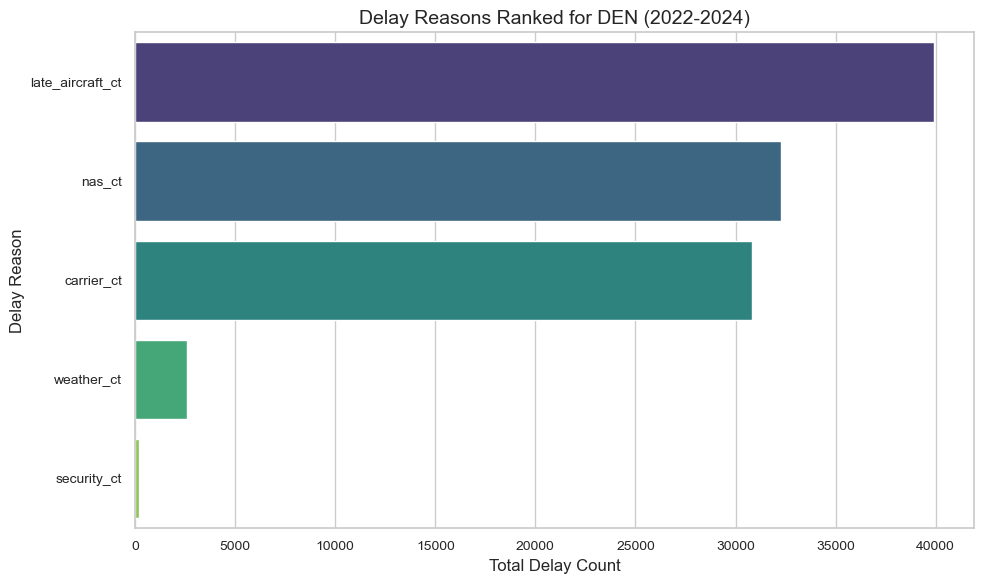

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2816863500.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


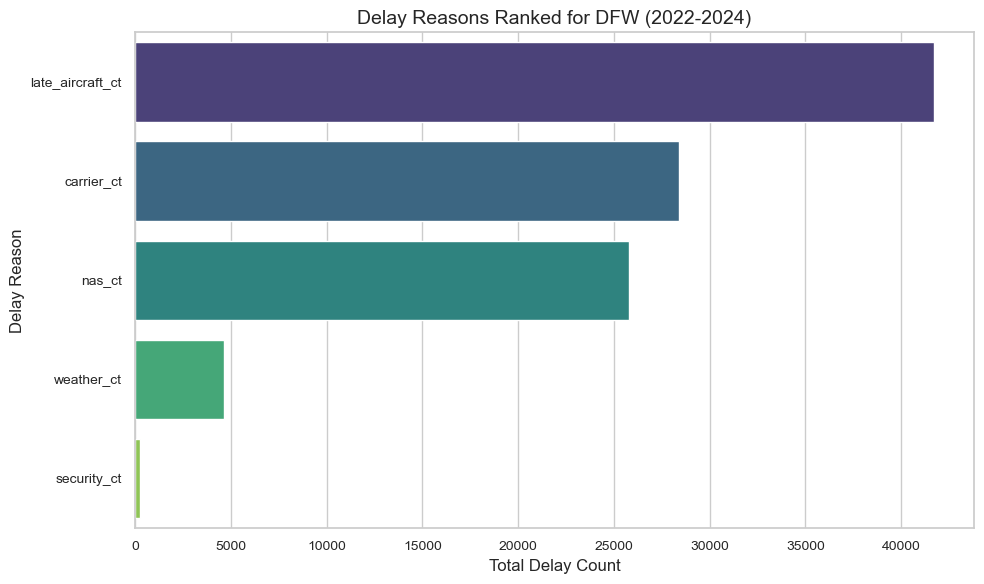

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2816863500.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


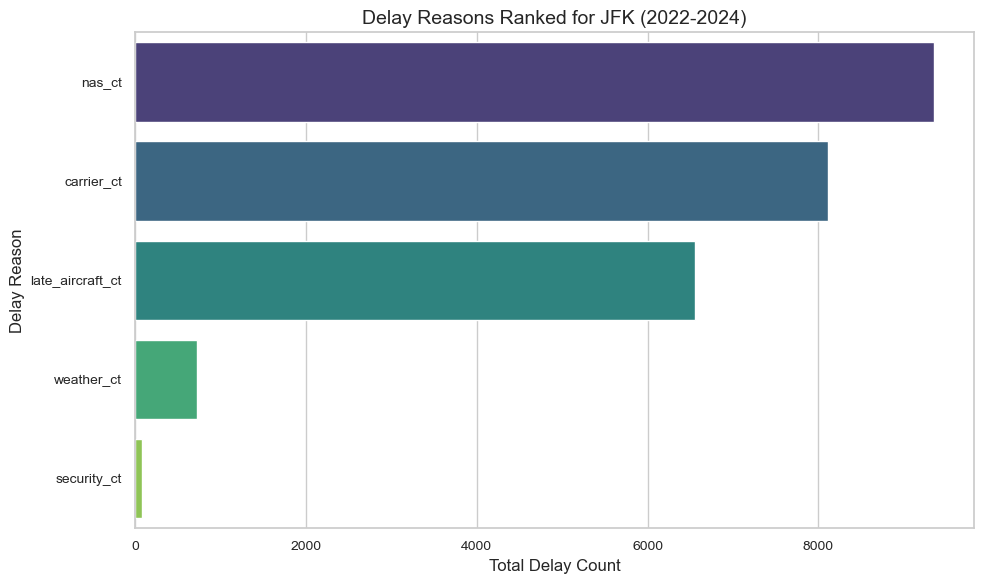

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2816863500.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


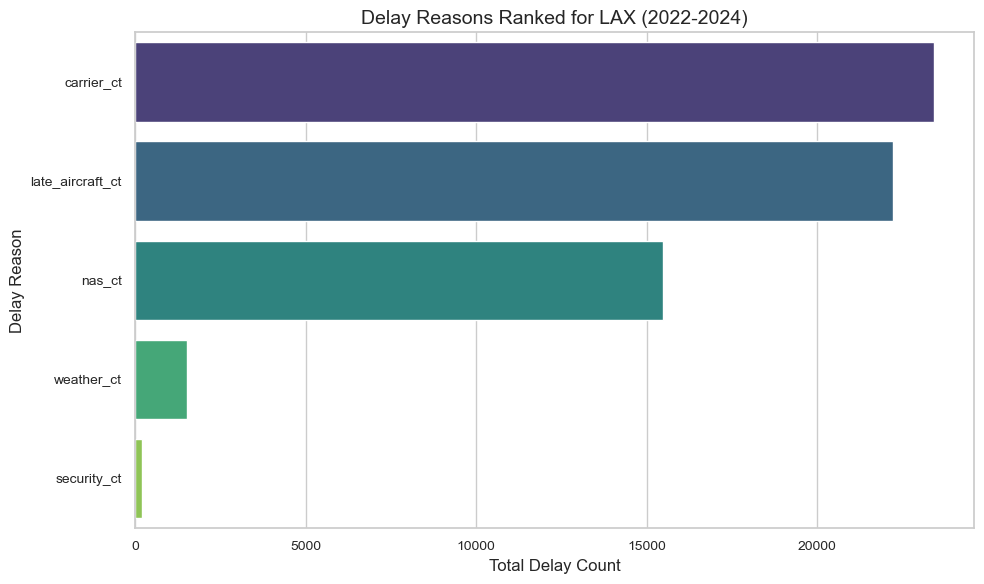

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2816863500.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


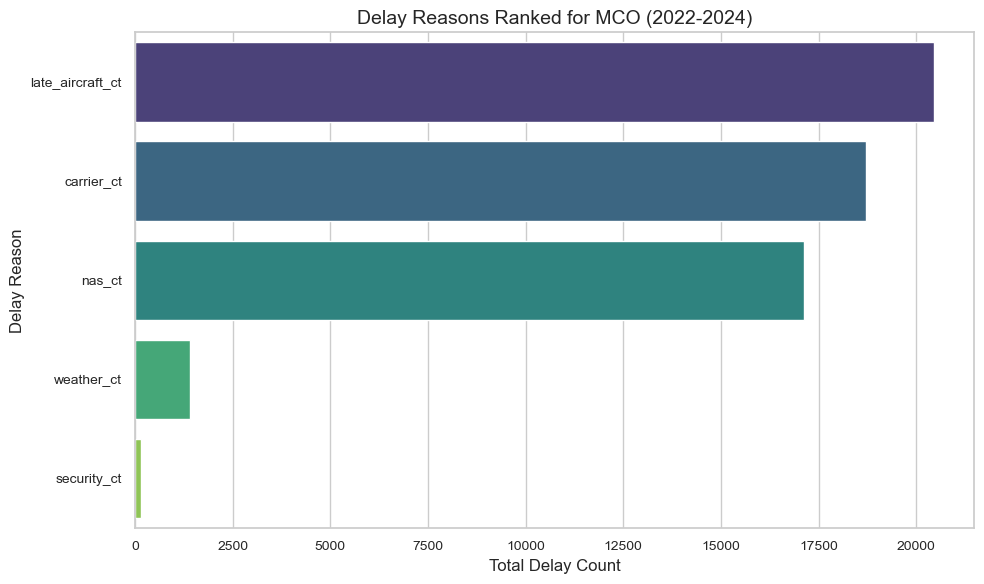

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2816863500.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


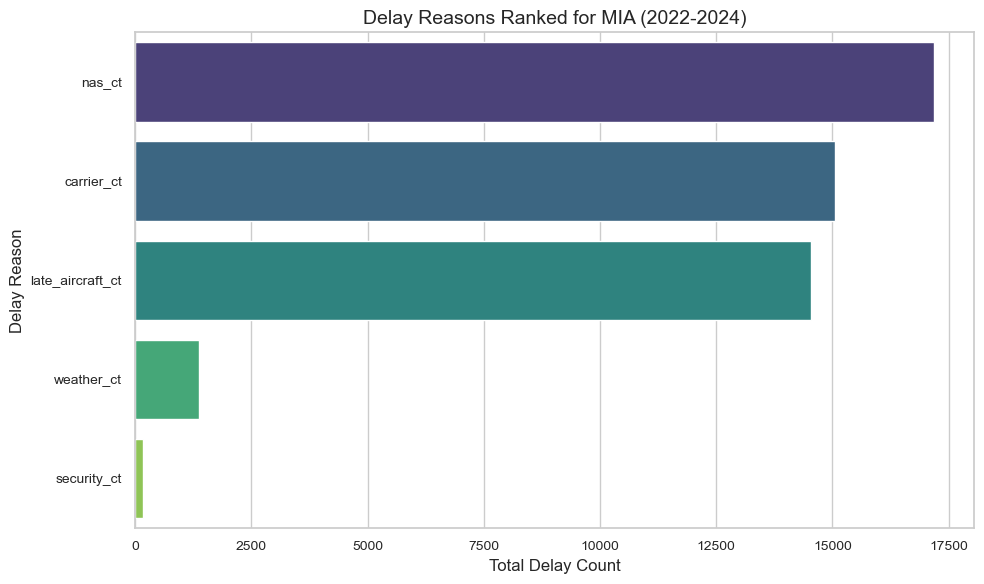

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2816863500.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


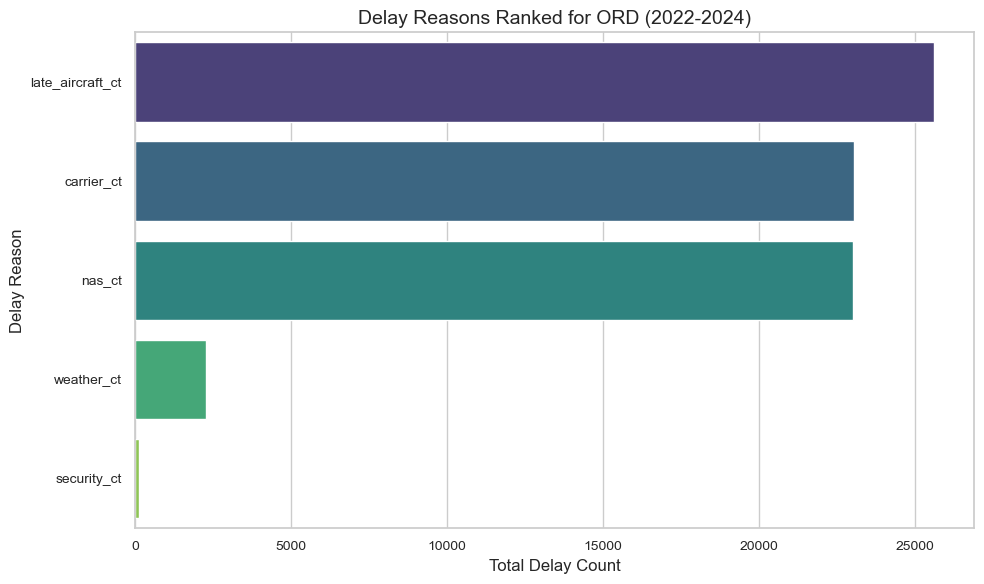

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2816863500.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


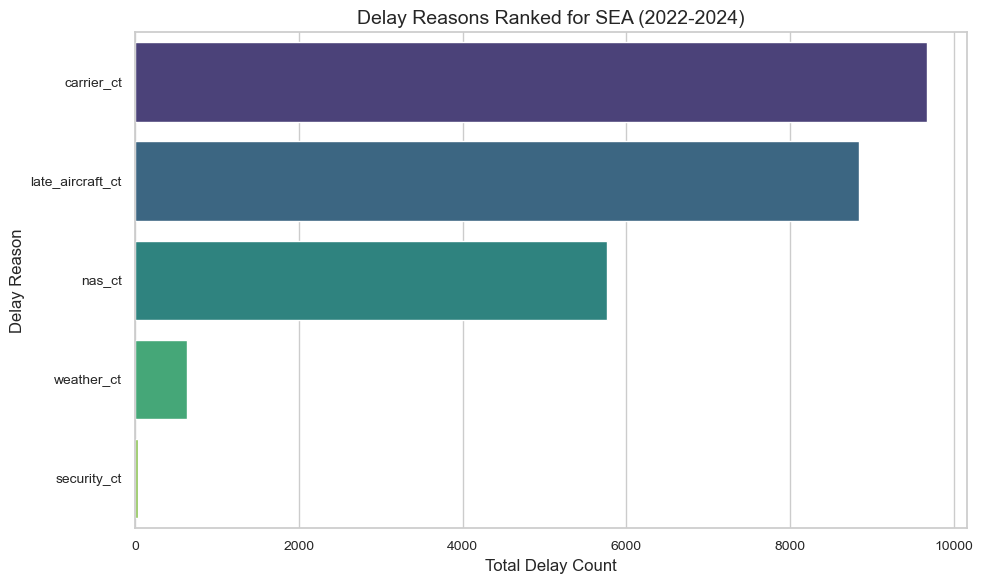

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2816863500.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


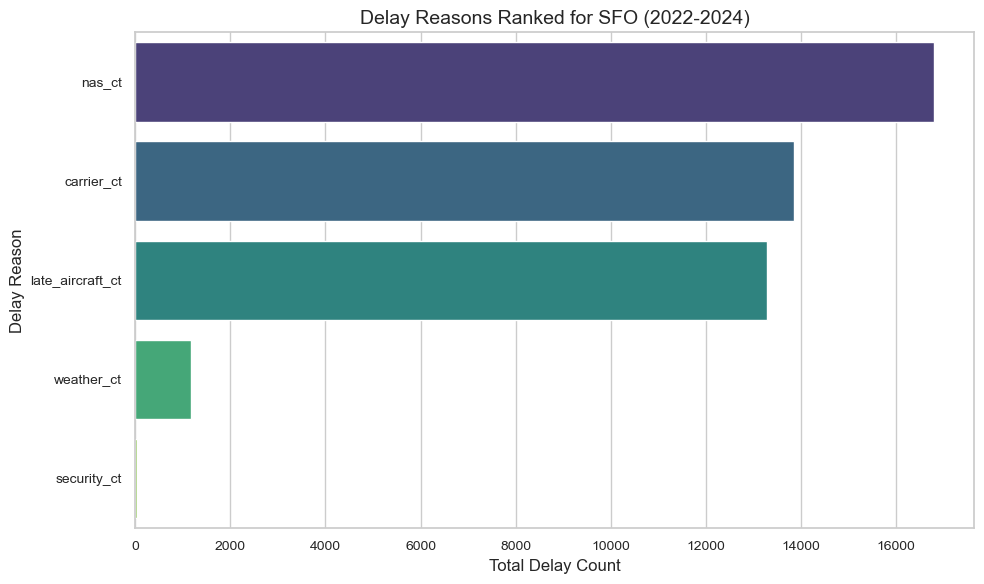

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
data = pd.read_csv(file_path)

# Ensure the relevant columns are numeric
data['carrier_ct'] = pd.to_numeric(data['carrier_ct'], errors='coerce')
data['weather_ct'] = pd.to_numeric(data['weather_ct'], errors='coerce')
data['nas_ct'] = pd.to_numeric(data['nas_ct'], errors='coerce')
data['security_ct'] = pd.to_numeric(data['security_ct'], errors='coerce')
data['late_aircraft_ct'] = pd.to_numeric(data['late_aircraft_ct'], errors='coerce')

# List of specified airports
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "SEA", "MCO", "MIA"]

# Filter the data for the specified airports
filtered_data = data[data['airport'].isin(airports)]

# Group by airport and sum the delay reasons
grouped_data = filtered_data.groupby('airport')[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

# Plot a bar chart for each airport
for airport, delays in grouped_data.iterrows():
  plt.figure(figsize=(10, 6))
  sorted_delays = delays.sort_values(ascending=False)
  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')
  plt.title(f'Delay Reasons Ranked for {airport} (2022-2024)', fontsize=14)
  plt.xlabel('Total Delay Count', fontsize=12)
  plt.ylabel('Delay Reason', fontsize=12)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.tight_layout()
  plt.show()

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2873440851.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


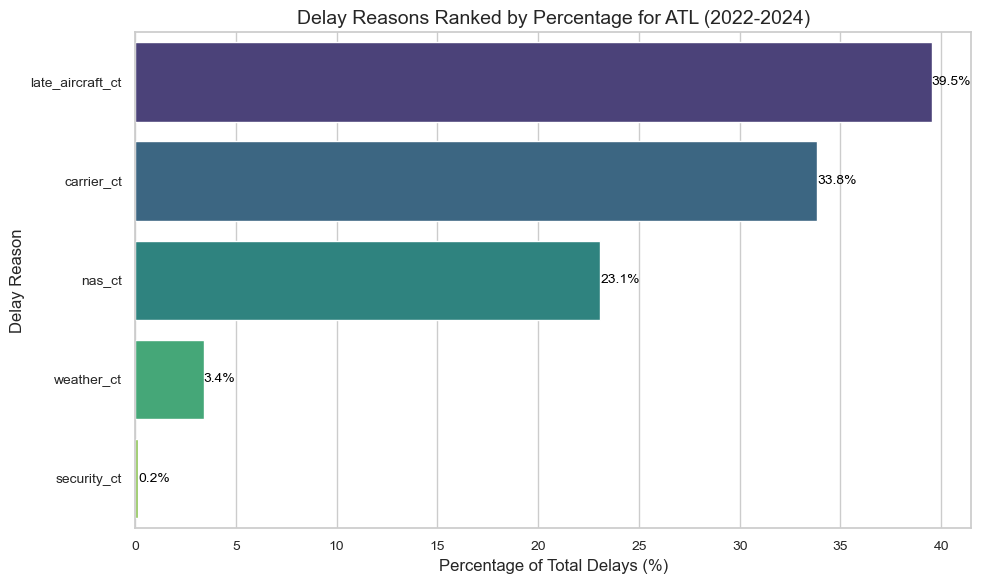

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2873440851.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


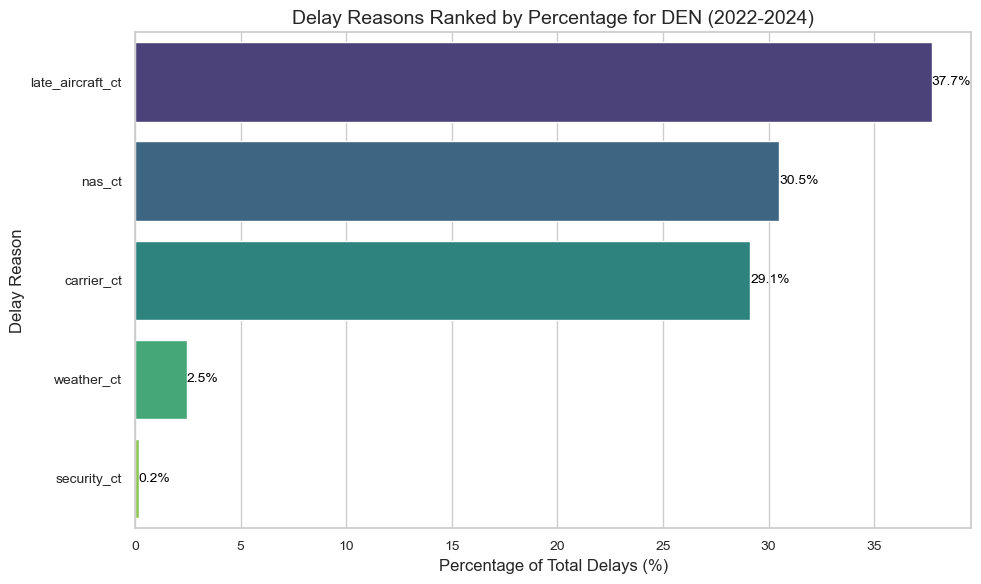

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2873440851.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


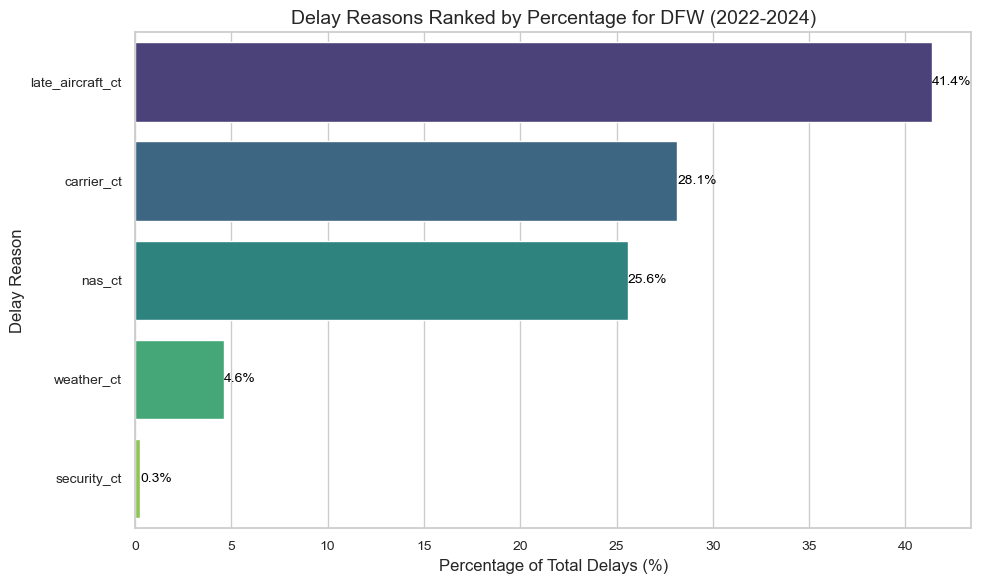

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2873440851.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


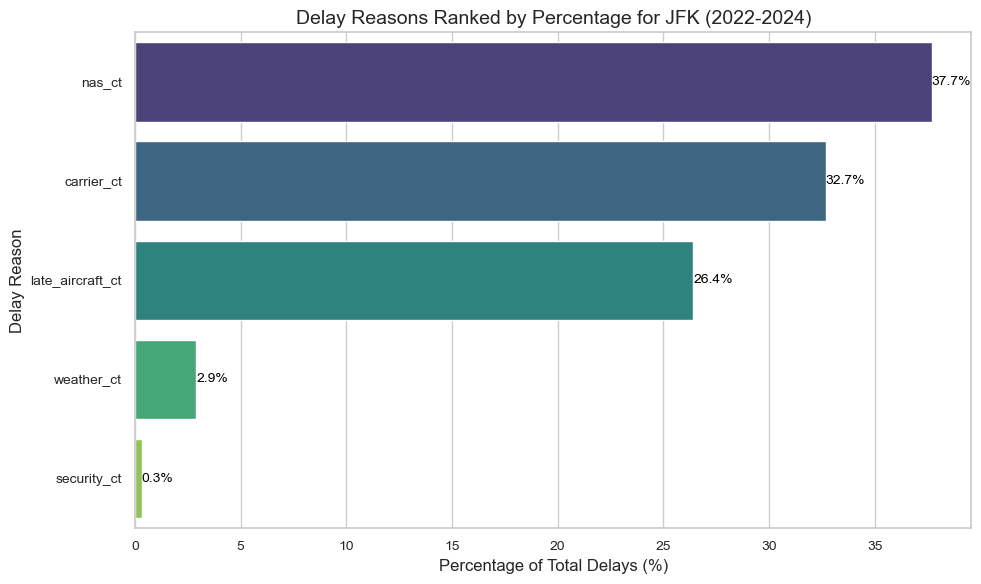

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2873440851.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


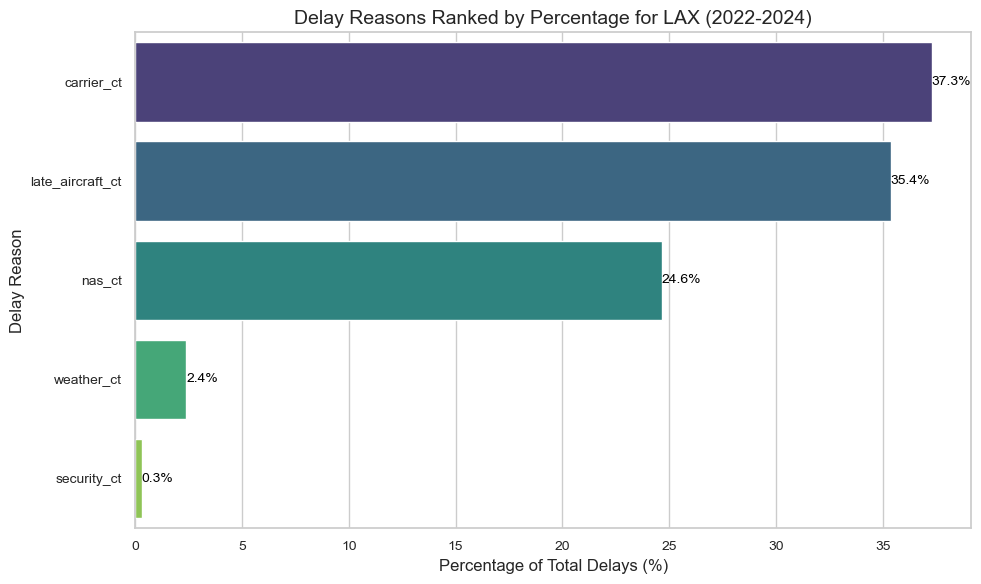

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2873440851.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


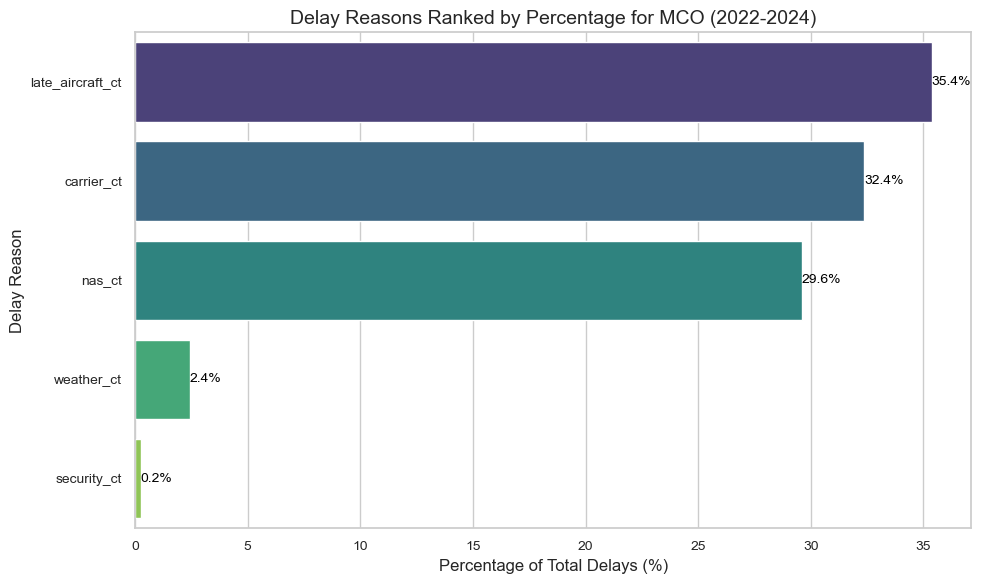

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2873440851.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


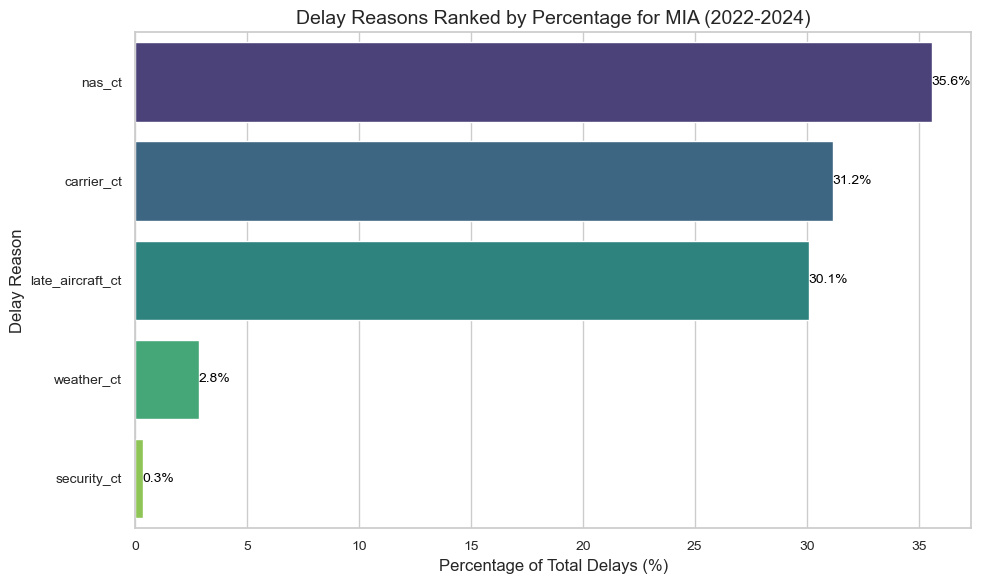

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2873440851.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


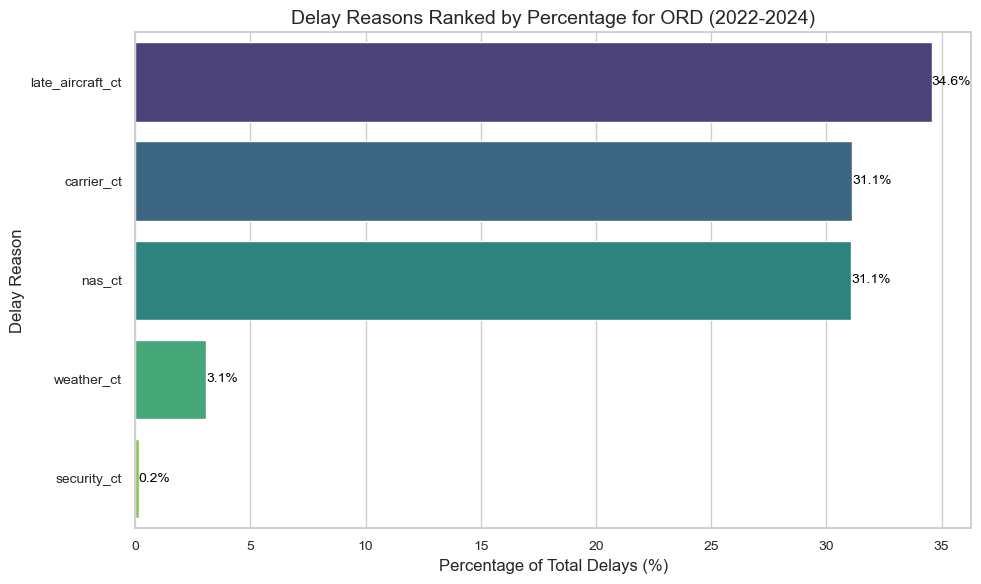

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2873440851.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


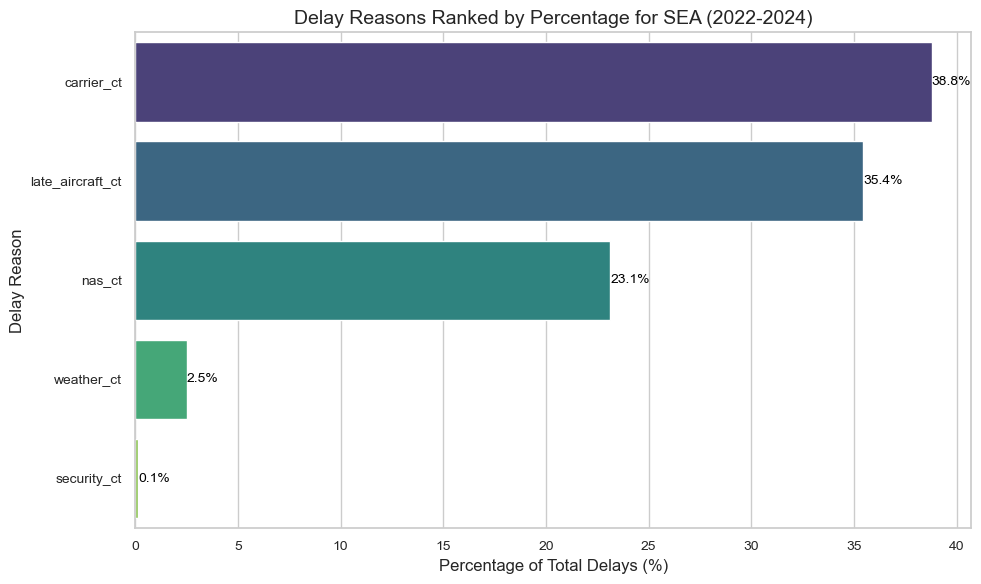

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14352\2873440851.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')


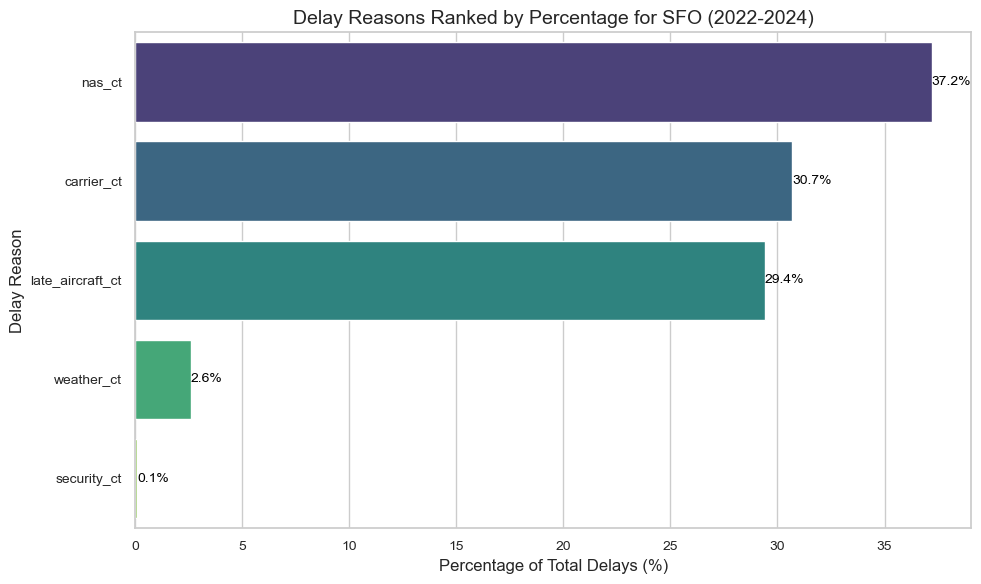

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
data = pd.read_csv(file_path)

# Ensure the relevant columns are numeric
data['carrier_ct'] = pd.to_numeric(data['carrier_ct'], errors='coerce')
data['weather_ct'] = pd.to_numeric(data['weather_ct'], errors='coerce')
data['nas_ct'] = pd.to_numeric(data['nas_ct'], errors='coerce')
data['security_ct'] = pd.to_numeric(data['security_ct'], errors='coerce')
data['late_aircraft_ct'] = pd.to_numeric(data['late_aircraft_ct'], errors='coerce')

# List of specified airports
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "SEA", "MCO", "MIA"]

# Filter the data for the specified airports
filtered_data = data[data['airport'].isin(airports)]

# Group by airport and sum the delay reasons
grouped_data = filtered_data.groupby('airport')[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

# Plot a bar chart for each airport
for airport, delays in grouped_data.iterrows():
    total_delays = delays.sum()
    delay_percentages = (delays / total_delays) * 100
    sorted_delays = delay_percentages.sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_delays.values, y=sorted_delays.index, palette='viridis')
    plt.title(f'Delay Reasons Ranked by Percentage for {airport} (2022-2024)', fontsize=14)
    plt.xlabel('Percentage of Total Delays (%)', fontsize=12)
    plt.ylabel('Delay Reason', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Annotate each bar with the percentage value
    for index, value in enumerate(sorted_delays):
        plt.text(value, index, f'{value:.1f}%', color='black', va="center", ha="left", fontsize=10)
    
    plt.tight_layout()
    plt.show()

In [79]:
import pandas as pd

# Load the data from the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
data = pd.read_csv(file_path)

# Ensure the relevant columns are numeric
data['carrier_ct'] = pd.to_numeric(data['carrier_ct'], errors='coerce')
data['weather_ct'] = pd.to_numeric(data['weather_ct'], errors='coerce')
data['nas_ct'] = pd.to_numeric(data['nas_ct'], errors='coerce')
data['security_ct'] = pd.to_numeric(data['security_ct'], errors='coerce')
data['late_aircraft_ct'] = pd.to_numeric(data['late_aircraft_ct'], errors='coerce')

# List of specified airports
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "SEA", "MCO", "MIA"]

# Filter the data for the specified airports
filtered_data = data[data['airport'].isin(airports)]

# Group by airport and sum the delay reasons
grouped_data = filtered_data.groupby('airport')[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

# Find the number one delay reason for each airport
for airport, delays in grouped_data.iterrows():
  total_delays = delays.sum()
  delay_percentages = (delays / total_delays) * 100
  top_reason = delay_percentages.idxmax()
  top_percentage = delay_percentages.max()
  
  print(f"Airport: {airport}")
  print(f"Top Delay Reason: {top_reason} ({top_percentage:.1f}%)\n")

Airport: ATL
Top Delay Reason: late_aircraft_ct (39.5%)

Airport: DEN
Top Delay Reason: late_aircraft_ct (37.7%)

Airport: DFW
Top Delay Reason: late_aircraft_ct (41.4%)

Airport: JFK
Top Delay Reason: nas_ct (37.7%)

Airport: LAX
Top Delay Reason: carrier_ct (37.3%)

Airport: MCO
Top Delay Reason: late_aircraft_ct (35.4%)

Airport: MIA
Top Delay Reason: nas_ct (35.6%)

Airport: ORD
Top Delay Reason: late_aircraft_ct (34.6%)

Airport: SEA
Top Delay Reason: carrier_ct (38.8%)

Airport: SFO
Top Delay Reason: nas_ct (37.2%)



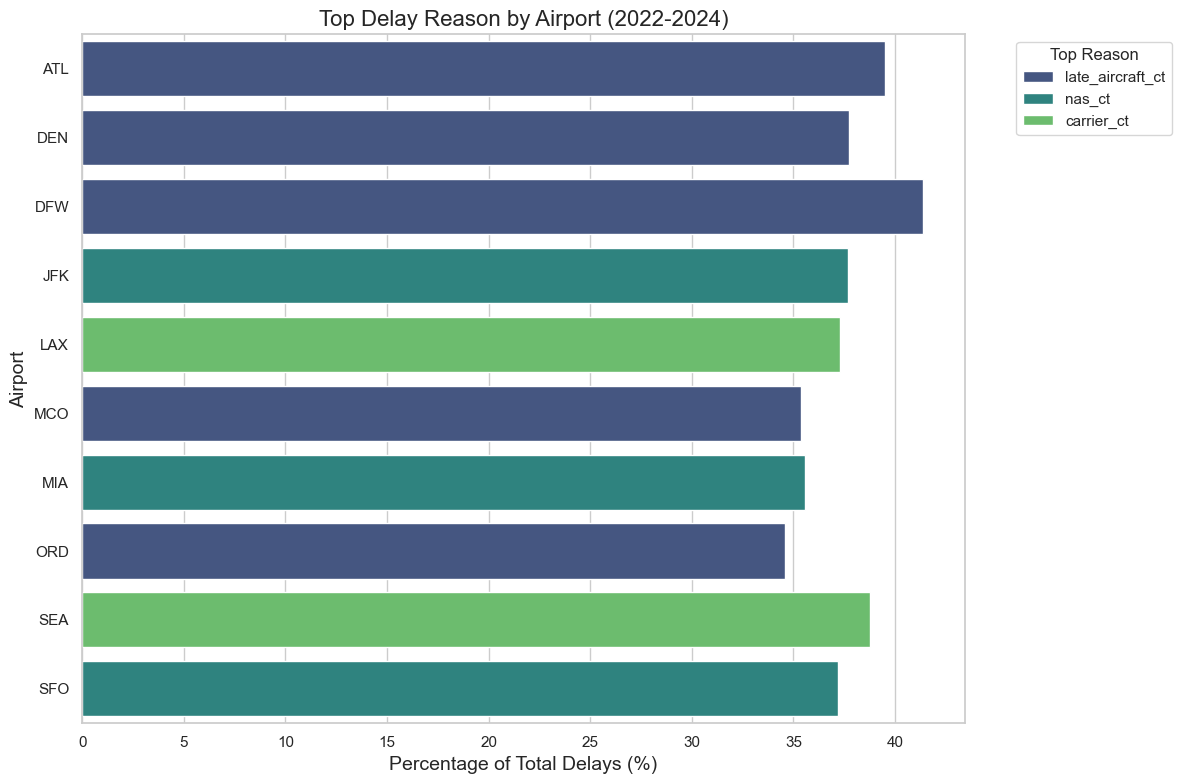

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = r"C:\Users\mehrd\Desktop\AA-UA-DL-WN-2022-23-24_with_ontime_chance.csv"
data = pd.read_csv(file_path)

# Ensure the relevant columns are numeric
data['carrier_ct'] = pd.to_numeric(data['carrier_ct'], errors='coerce')
data['weather_ct'] = pd.to_numeric(data['weather_ct'], errors='coerce')
data['nas_ct'] = pd.to_numeric(data['nas_ct'], errors='coerce')
data['security_ct'] = pd.to_numeric(data['security_ct'], errors='coerce')
data['late_aircraft_ct'] = pd.to_numeric(data['late_aircraft_ct'], errors='coerce')

# List of specified airports
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "SEA", "MCO", "MIA"]

# Filter the data for the specified airports
filtered_data = data[data['airport'].isin(airports)]

# Group by airport and sum the delay reasons
grouped_data = filtered_data.groupby('airport')[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

# Prepare data for plotting
top_reasons = []
top_percentages = []

for airport, delays in grouped_data.iterrows():
    total_delays = delays.sum()
    delay_percentages = (delays / total_delays) * 100
    top_reason = delay_percentages.idxmax()
    top_percentage = delay_percentages.max()
    
    top_reasons.append((airport, top_reason, top_percentage))

# Convert to DataFrame for plotting
top_reasons_df = pd.DataFrame(top_reasons, columns=['Airport', 'Top Reason', 'Percentage'])

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y='Airport', hue='Top Reason', data=top_reasons_df, dodge=False, palette='viridis')
plt.title('Top Delay Reason by Airport (2022-2024)', fontsize=16)
plt.xlabel('Percentage of Total Delays (%)', fontsize=14)
plt.ylabel('Airport', fontsize=14)
plt.legend(title='Top Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()